In [30]:
# -*- coding: utf-8 -*-

from keras.layers import Dense, Activation,Flatten
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np

sns.set()

plt.style.use('ggplot')

In [9]:
# NOTE : 데이터셋 생성
(train_img, train_lab), (test_img, test_lab) = fashion_mnist.load_data()

# NOTE
# train_lab은 0에서 사이의 정수, train_img는 0~255 사이의 픽셀값
print(train_lab)
train_img.shape, train_lab.shape

[9 0 0 ... 3 0 5]


((60000, 28, 28), (60000,))

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

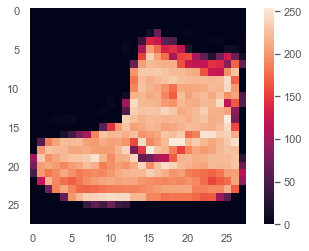

In [12]:
# NOTE 
# train set의 첫 번째 이미지를 보여줌.
# 그래프를 보면 0 ~ 255사이의 값이 나타남을 보여줌.

plt.figure()

plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)

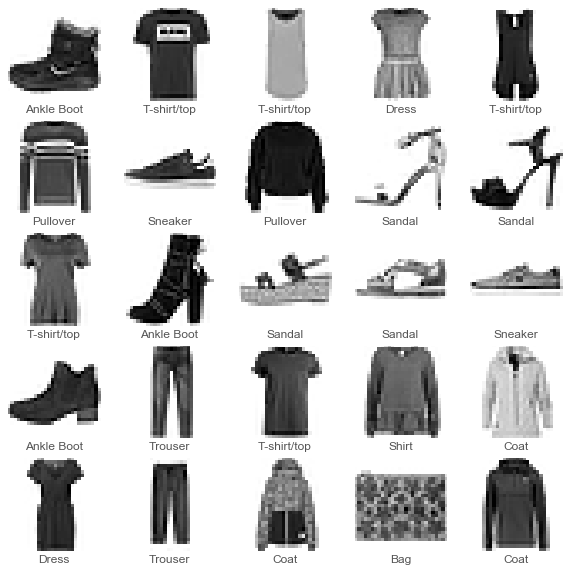

In [13]:
# NOTE : Normalization(정규화)
train_img = train_img / 255.0
test_img = test_img / 255.0

# NOTE 
# train set에서 처음 25개의 이미지와 클래스 이름 출력
plt.figure(figsize=(10, 10))
for img in range(25):
    plt.subplot(5, 5, img+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[img], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lab[img]])

In [14]:
# NOTE : model 구성
# NOTE : layer 설정


# NOTE
# Flatten : 2차원 배열을 1차원 배열로 만들어줌.
model = Sequential([
        Flatten(input_shape = (28, 28)),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)])

# NOTE
# 첫 번째 Dense 층은 128개의 신경망 노드를 가짐.
# 두 번째 Dense 층은 10개의 신경망 노드를 가진 softmax 층.
#        이 층은 10개의 노드의 확률을 반환하고, 합은 1임.

In [18]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam', metrics = ['accuracy'])

# NOTE
# loss : 훈련하는 동안 모델의 오차를 측정하는 손실함수를 설정하는 매개변수
# optimizer : 손실함수 값을 최소화 시키는 최적화함수를 설정하는 매개변수
# metrics : 훈련 단계와 테스트 단계를 모니터링
#           이 경우에는 정확도를 사용.


# NOTE : 훈련 데이터를 모델에 주입
# 모델이 이미지와 레이블을 매핑하는 방법을 배움.
model.fit(train_img, train_lab, epochs = 10)

Epoch 1/10
   32/60000 [..............................] - ETA: 3:08 - loss: 0.2414 - acc: 0.8750

  512/60000 [..............................] - ETA: 17s - loss: 0.3065 - acc: 0.8965 

  928/60000 [..............................] - ETA: 13s - loss: 0.3402 - acc: 0.8782

 1408/60000 [..............................] - ETA: 10s - loss: 0.3257 - acc: 0.8857

 1696/60000 [..............................] - ETA: 10s - loss: 0.3048 - acc: 0.8950

 2080/60000 [>.............................] - ETA: 10s - loss: 0.2981 - acc: 0.8957

 2528/60000 [>.............................] - ETA: 9s - loss: 0.2941 - acc: 0.8960 

 2912/60000 [>.............................] - ETA: 9s - loss: 0.2953 - acc: 0.8963

 3392/60000 [>.............................] - ETA: 8s - loss: 0.2932 - acc: 0.8974

 3968/60000 [>.............................] - ETA: 8s - loss: 0.2927 - acc: 0.8962

 4544/60000 [=>............................] - ETA: 7s - loss: 0.2878 - acc: 0.8985

 5120/60000 [=>............................] - ETA: 7s - loss: 0.2888 - acc: 0.8977

 5696/60000 [=>............................] - ETA: 6s - loss: 0.2881 - acc: 0.8982

 6240/60000 [==>...........................] - ETA: 6s - loss: 0.2861 - acc: 0.8990

 6784/60000 [==>...........................] - ETA: 6s - loss: 0.2847 - acc: 0.8987

 7296/60000 [==>...........................] - ETA: 6s - loss: 0.2831 - acc: 0.9002

 7872/60000 [==>...........................] - ETA: 6s - loss: 0.2802 - acc: 0.9009

 8448/60000 [===>..........................] - ETA: 6s - loss: 0.2818 - acc: 0.9000

 9024/60000 [===>..........................] - ETA: 5s - loss: 0.2807 - acc: 0.8995

 9600/60000 [===>..........................] - ETA: 5s - loss: 0.2796 - acc: 0.8996

10112/60000 [====>.........................] - ETA: 5s - loss: 0.2803 - acc: 0.8993

10656/60000 [====>.........................] - ETA: 5s - loss: 0.2804 - acc: 0.8988

11232/60000 [====>.........................] - ETA: 5s - loss: 0.2772 - acc: 0.8993

11840/60000 [====>.........................] - ETA: 5s - loss: 0.2794 - acc: 0.8986

12384/60000 [=====>........................] - ETA: 5s - loss: 0.2791 - acc: 0.8986

12928/60000 [=====>........................] - ETA: 5s - loss: 0.2787 - acc: 0.8987

13376/60000 [=====>........................] - ETA: 5s - loss: 0.2789 - acc: 0.8987

13888/60000 [=====>........................] - ETA: 5s - loss: 0.2790 - acc: 0.8993

14368/60000 [======>.......................] - ETA: 4s - loss: 0.2776 - acc: 0.8998

14720/60000 [======>.......................] - ETA: 4s - loss: 0.2793 - acc: 0.8991

15296/60000 [======>.......................] - ETA: 4s - loss: 0.2795 - acc: 0.8989

15872/60000 [======>.......................] - ETA: 4s - loss: 0.2811 - acc: 0.8984

16448/60000 [=======>......................] - ETA: 4s - loss: 0.2814 - acc: 0.8982

17056/60000 [=======>......................] - ETA: 4s - loss: 0.2821 - acc: 0.8978

17632/60000 [=======>......................] - ETA: 4s - loss: 0.2829 - acc: 0.8977

18144/60000 [========>.....................] - ETA: 4s - loss: 0.2815 - acc: 0.8980

18464/60000 [========>.....................] - ETA: 4s - loss: 0.2806 - acc: 0.8985

18944/60000 [========>.....................] - ETA: 4s - loss: 0.2795 - acc: 0.8990

19456/60000 [========>.....................] - ETA: 4s - loss: 0.2776 - acc: 0.8996

20032/60000 [=========>....................] - ETA: 4s - loss: 0.2792 - acc: 0.8991

20544/60000 [=========>....................] - ETA: 4s - loss: 0.2789 - acc: 0.8989

20992/60000 [=========>....................] - ETA: 4s - loss: 0.2805 - acc: 0.8983

21504/60000 [=========>....................] - ETA: 4s - loss: 0.2795 - acc: 0.8988

21952/60000 [=========>....................] - ETA: 4s - loss: 0.2798 - acc: 0.8985

22400/60000 [==========>...................] - ETA: 4s - loss: 0.2815 - acc: 0.8980

22976/60000 [==========>...................] - ETA: 3s - loss: 0.2814 - acc: 0.8981

23552/60000 [==========>...................] - ETA: 3s - loss: 0.2815 - acc: 0.8982

24096/60000 [===========>..................] - ETA: 3s - loss: 0.2814 - acc: 0.8978

24672/60000 [===========>..................] - ETA: 3s - loss: 0.2807 - acc: 0.8980

25216/60000 [===========>..................] - ETA: 3s - loss: 0.2818 - acc: 0.8974

25696/60000 [===========>..................] - ETA: 3s - loss: 0.2808 - acc: 0.8976

26208/60000 [============>.................] - ETA: 3s - loss: 0.2817 - acc: 0.8974

26720/60000 [============>.................] - ETA: 3s - loss: 0.2813 - acc: 0.8975

27264/60000 [============>.................] - ETA: 3s - loss: 0.2813 - acc: 0.8977

27840/60000 [============>.................] - ETA: 3s - loss: 0.2805 - acc: 0.8980

28416/60000 [=============>................] - ETA: 3s - loss: 0.2807 - acc: 0.8977

28960/60000 [=============>................] - ETA: 3s - loss: 0.2802 - acc: 0.8979

29568/60000 [=============>................] - ETA: 3s - loss: 0.2801 - acc: 0.8978

30176/60000 [==============>...............] - ETA: 3s - loss: 0.2798 - acc: 0.8980

30816/60000 [==============>...............] - ETA: 2s - loss: 0.2804 - acc: 0.8981

31456/60000 [==============>...............] - ETA: 2s - loss: 0.2809 - acc: 0.8977

32064/60000 [===============>..............] - ETA: 2s - loss: 0.2818 - acc: 0.8973

32672/60000 [===============>..............] - ETA: 2s - loss: 0.2815 - acc: 0.8974

33216/60000 [===============>..............] - ETA: 2s - loss: 0.2817 - acc: 0.8974

33824/60000 [===============>..............] - ETA: 2s - loss: 0.2822 - acc: 0.8971

34400/60000 [================>.............] - ETA: 2s - loss: 0.2825 - acc: 0.8970

35008/60000 [================>.............] - ETA: 2s - loss: 0.2822 - acc: 0.8971

35648/60000 [================>.............] - ETA: 2s - loss: 0.2828 - acc: 0.8968

36224/60000 [=================>............] - ETA: 2s - loss: 0.2815 - acc: 0.8971

36768/60000 [=================>............] - ETA: 2s - loss: 0.2825 - acc: 0.8969

37376/60000 [=================>............] - ETA: 2s - loss: 0.2831 - acc: 0.8964

38016/60000 [==================>...........] - ETA: 2s - loss: 0.2833 - acc: 0.8963

38624/60000 [==================>...........] - ETA: 2s - loss: 0.2830 - acc: 0.8967

39232/60000 [==================>...........] - ETA: 2s - loss: 0.2834 - acc: 0.8966

39840/60000 [==================>...........] - ETA: 1s - loss: 0.2831 - acc: 0.8965

40416/60000 [===================>..........] - ETA: 1s - loss: 0.2831 - acc: 0.8964

41024/60000 [===================>..........] - ETA: 1s - loss: 0.2830 - acc: 0.8964



41664/60000 [===================>..........] - ETA: 1s - loss: 0.2829 - acc: 0.8963

42208/60000 [====================>.........] - ETA: 1s - loss: 0.2828 - acc: 0.8964

42816/60000 [====================>.........] - ETA: 1s - loss: 0.2826 - acc: 0.8966

43456/60000 [====================>.........] - ETA: 1s - loss: 0.2824 - acc: 0.8966

44064/60000 [=====================>........] - ETA: 1s - loss: 0.2835 - acc: 0.8963

44640/60000 [=====================>........] - ETA: 1s - loss: 0.2834 - acc: 0.8965

45248/60000 [=====================>........] - ETA: 1s - loss: 0.2832 - acc: 0.8967

45856/60000 [=====================>........] - ETA: 1s - loss: 0.2834 - acc: 0.8967

46368/60000 [======================>.......] - ETA: 1s - loss: 0.2831 - acc: 0.8969

46816/60000 [======================>.......] - ETA: 1s - loss: 0.2827 - acc: 0.8970

47392/60000 [======================>.......] - ETA: 1s - loss: 0.2826 - acc: 0.8970

48000/60000 [=======================>......] - ETA: 1s - loss: 0.2826 - acc: 0.8971

48608/60000 [=======================>......] - ETA: 1s - loss: 0.2830 - acc: 0.8970



49248/60000 [=======================>......] - ETA: 1s - loss: 0.2831 - acc: 0.8969

49760/60000 [=======================>......] - ETA: 0s - loss: 0.2838 - acc: 0.8966

50368/60000 [========================>.....] - ETA: 0s - loss: 0.2841 - acc: 0.8964

50976/60000 [========================>.....] - ETA: 0s - loss: 0.2848 - acc: 0.8963

51584/60000 [========================>.....] - ETA: 0s - loss: 0.2846 - acc: 0.8964

52192/60000 [=========================>....] - ETA: 0s - loss: 0.2848 - acc: 0.8965

52800/60000 [=========================>....] - ETA: 0s - loss: 0.2848 - acc: 0.8965

53344/60000 [=========================>....] - ETA: 0s - loss: 0.2847 - acc: 0.8965

53952/60000 [=========================>....] - ETA: 0s - loss: 0.2842 - acc: 0.8965

54560/60000 [==========================>...] - ETA: 0s - loss: 0.2844 - acc: 0.8964

55200/60000 [==========================>...] - ETA: 0s - loss: 0.2838 - acc: 0.8967

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2833 - acc: 0.8968

56416/60000 [===========================>..] - ETA: 0s - loss: 0.2834 - acc: 0.8966

57024/60000 [===========================>..] - ETA: 0s - loss: 0.2835 - acc: 0.8968

57632/60000 [===========================>..] - ETA: 0s - loss: 0.2831 - acc: 0.8970

58240/60000 [============================>.] - ETA: 0s - loss: 0.2833 - acc: 0.8969

58848/60000 [============================>.] - ETA: 0s - loss: 0.2835 - acc: 0.8968

59456/60000 [============================>.] - ETA: 0s - loss: 0.2836 - acc: 0.8969

60000/60000 [==============================] - 6s 95us/step - loss: 0.2835 - acc: 0.8968


Epoch 2/10
   32/60000 [..............................] - ETA: 11s - loss: 0.2611 - acc: 0.9062

  480/60000 [..............................] - ETA: 7s - loss: 0.2272 - acc: 0.9167 

 1056/60000 [..............................] - ETA: 6s - loss: 0.2673 - acc: 0.9062

 1664/60000 [..............................] - ETA: 5s - loss: 0.2932 - acc: 0.8930

 2272/60000 [>.............................] - ETA: 5s - loss: 0.2910 - acc: 0.8913

 2880/60000 [>.............................] - ETA: 5s - loss: 0.2880 - acc: 0.8931

 3488/60000 [>.............................] - ETA: 5s - loss: 0.2787 - acc: 0.8971

 4096/60000 [=>............................] - ETA: 5s - loss: 0.2731 - acc: 0.9001

 4704/60000 [=>............................] - ETA: 4s - loss: 0.2670 - acc: 0.9014

 5312/60000 [=>............................] - ETA: 4s - loss: 0.2700 - acc: 0.9006



 5920/60000 [=>............................] - ETA: 4s - loss: 0.2680 - acc: 0.9007

 6432/60000 [==>...........................] - ETA: 4s - loss: 0.2632 - acc: 0.9019

 6944/60000 [==>...........................] - ETA: 4s - loss: 0.2644 - acc: 0.9028

 7456/60000 [==>...........................] - ETA: 4s - loss: 0.2619 - acc: 0.9033

 8064/60000 [===>..........................] - ETA: 4s - loss: 0.2620 - acc: 0.9033

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.2619 - acc: 0.9023

 9312/60000 [===>..........................] - ETA: 4s - loss: 0.2646 - acc: 0.9018

 9952/60000 [===>..........................] - ETA: 4s - loss: 0.2644 - acc: 0.9008

10592/60000 [====>.........................] - ETA: 4s - loss: 0.2662 - acc: 0.9000

11232/60000 [====>.........................] - ETA: 4s - loss: 0.2649 - acc: 0.9004

11808/60000 [====>.........................] - ETA: 4s - loss: 0.2652 - acc: 0.9007

12448/60000 [=====>........................] - ETA: 4s - loss: 0.2666 - acc: 0.9000

13056/60000 [=====>........................] - ETA: 4s - loss: 0.2670 - acc: 0.8997

13664/60000 [=====>........................] - ETA: 4s - loss: 0.2672 - acc: 0.8997

14304/60000 [======>.......................] - ETA: 4s - loss: 0.2658 - acc: 0.9006

14944/60000 [======>.......................] - ETA: 3s - loss: 0.2651 - acc: 0.9008

15584/60000 [======>.......................] - ETA: 3s - loss: 0.2659 - acc: 0.9012

16224/60000 [=======>......................] - ETA: 3s - loss: 0.2677 - acc: 0.9006

16864/60000 [=======>......................] - ETA: 3s - loss: 0.2669 - acc: 0.9007

17504/60000 [=======>......................] - ETA: 3s - loss: 0.2657 - acc: 0.9016

18144/60000 [========>.....................] - ETA: 3s - loss: 0.2648 - acc: 0.9022

18720/60000 [========>.....................] - ETA: 3s - loss: 0.2654 - acc: 0.9021

19328/60000 [========>.....................] - ETA: 3s - loss: 0.2650 - acc: 0.9022

19968/60000 [========>.....................] - ETA: 3s - loss: 0.2664 - acc: 0.9016

20608/60000 [=========>....................] - ETA: 3s - loss: 0.2662 - acc: 0.9014

21248/60000 [=========>....................] - ETA: 3s - loss: 0.2657 - acc: 0.9009

21888/60000 [=========>....................] - ETA: 3s - loss: 0.2652 - acc: 0.9011

22368/60000 [==========>...................] - ETA: 3s - loss: 0.2650 - acc: 0.9011

22912/60000 [==========>...................] - ETA: 3s - loss: 0.2648 - acc: 0.9011

23552/60000 [==========>...................] - ETA: 3s - loss: 0.2659 - acc: 0.9009

24096/60000 [===========>..................] - ETA: 3s - loss: 0.2668 - acc: 0.9006

24736/60000 [===========>..................] - ETA: 3s - loss: 0.2666 - acc: 0.9008

25376/60000 [===========>..................] - ETA: 2s - loss: 0.2670 - acc: 0.9006

25984/60000 [===========>..................] - ETA: 2s - loss: 0.2670 - acc: 0.9004

26592/60000 [============>.................] - ETA: 2s - loss: 0.2664 - acc: 0.9007

27232/60000 [============>.................] - ETA: 2s - loss: 0.2654 - acc: 0.9009

27872/60000 [============>.................] - ETA: 2s - loss: 0.2653 - acc: 0.9010

28512/60000 [=============>................] - ETA: 2s - loss: 0.2648 - acc: 0.9011

29152/60000 [=============>................] - ETA: 2s - loss: 0.2641 - acc: 0.9014

29792/60000 [=============>................] - ETA: 2s - loss: 0.2644 - acc: 0.9015

30432/60000 [==============>...............] - ETA: 2s - loss: 0.2638 - acc: 0.9018

31040/60000 [==============>...............] - ETA: 2s - loss: 0.2635 - acc: 0.9020

31680/60000 [==============>...............] - ETA: 2s - loss: 0.2645 - acc: 0.9017

32320/60000 [===============>..............] - ETA: 2s - loss: 0.2647 - acc: 0.9015

32960/60000 [===============>..............] - ETA: 2s - loss: 0.2646 - acc: 0.9015

33600/60000 [===============>..............] - ETA: 2s - loss: 0.2647 - acc: 0.9015

34240/60000 [================>.............] - ETA: 2s - loss: 0.2658 - acc: 0.9011

34880/60000 [================>.............] - ETA: 2s - loss: 0.2653 - acc: 0.9012

35520/60000 [================>.............] - ETA: 2s - loss: 0.2658 - acc: 0.9008

36160/60000 [=================>............] - ETA: 2s - loss: 0.2664 - acc: 0.9005

36800/60000 [=================>............] - ETA: 1s - loss: 0.2665 - acc: 0.9003

37440/60000 [=================>............] - ETA: 1s - loss: 0.2666 - acc: 0.9003

38016/60000 [==================>...........] - ETA: 1s - loss: 0.2666 - acc: 0.9004

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2663 - acc: 0.9006

39264/60000 [==================>...........] - ETA: 1s - loss: 0.2666 - acc: 0.9004

39904/60000 [==================>...........] - ETA: 1s - loss: 0.2668 - acc: 0.9004

40544/60000 [===================>..........] - ETA: 1s - loss: 0.2675 - acc: 0.9003

41184/60000 [===================>..........] - ETA: 1s - loss: 0.2683 - acc: 0.9001

41824/60000 [===================>..........] - ETA: 1s - loss: 0.2705 - acc: 0.8995

42464/60000 [====================>.........] - ETA: 1s - loss: 0.2711 - acc: 0.8993

43072/60000 [====================>.........] - ETA: 1s - loss: 0.2709 - acc: 0.8994

43712/60000 [====================>.........] - ETA: 1s - loss: 0.2709 - acc: 0.8992

44352/60000 [=====================>........] - ETA: 1s - loss: 0.2709 - acc: 0.8991

44992/60000 [=====================>........] - ETA: 1s - loss: 0.2707 - acc: 0.8993

45600/60000 [=====================>........] - ETA: 1s - loss: 0.2709 - acc: 0.8993

46240/60000 [======================>.......] - ETA: 1s - loss: 0.2705 - acc: 0.8994

46880/60000 [======================>.......] - ETA: 1s - loss: 0.2698 - acc: 0.8997

47488/60000 [======================>.......] - ETA: 1s - loss: 0.2694 - acc: 0.8999

48128/60000 [=======================>......] - ETA: 1s - loss: 0.2692 - acc: 0.8999

48704/60000 [=======================>......] - ETA: 0s - loss: 0.2693 - acc: 0.8999

49312/60000 [=======================>......] - ETA: 0s - loss: 0.2696 - acc: 0.9000

49952/60000 [=======================>......] - ETA: 0s - loss: 0.2700 - acc: 0.8997

50592/60000 [========================>.....] - ETA: 0s - loss: 0.2697 - acc: 0.8998

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2701 - acc: 0.8998

51840/60000 [========================>.....] - ETA: 0s - loss: 0.2704 - acc: 0.8997

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2707 - acc: 0.8996

53120/60000 [=========================>....] - ETA: 0s - loss: 0.2707 - acc: 0.8997

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2704 - acc: 0.8998

54400/60000 [==========================>...] - ETA: 0s - loss: 0.2705 - acc: 0.8998

55008/60000 [==========================>...] - ETA: 0s - loss: 0.2700 - acc: 0.8999

55616/60000 [==========================>...] - ETA: 0s - loss: 0.2703 - acc: 0.8998

56256/60000 [===========================>..] - ETA: 0s - loss: 0.2708 - acc: 0.8997

56896/60000 [===========================>..] - ETA: 0s - loss: 0.2706 - acc: 0.8998

57536/60000 [===========================>..] - ETA: 0s - loss: 0.2710 - acc: 0.8997

58176/60000 [============================>.] - ETA: 0s - loss: 0.2708 - acc: 0.8998

58816/60000 [============================>.] - ETA: 0s - loss: 0.2708 - acc: 0.8998

59328/60000 [============================>.] - ETA: 0s - loss: 0.2709 - acc: 0.8998

59744/60000 [============================>.] - ETA: 0s - loss: 0.2709 - acc: 0.8998



60000/60000 [==============================] - 5s 85us/step - loss: 0.2707 - acc: 0.8999


Epoch 3/10
   32/60000 [..............................] - ETA: 11s - loss: 0.2962 - acc: 0.9062

  480/60000 [..............................] - ETA: 7s - loss: 0.2221 - acc: 0.9187 



 1088/60000 [..............................] - ETA: 5s - loss: 0.2431 - acc: 0.9108



 1568/60000 [..............................] - ETA: 6s - loss: 0.2455 - acc: 0.9094

 2048/60000 [>.............................] - ETA: 6s - loss: 0.2460 - acc: 0.9058

 2656/60000 [>.............................] - ETA: 5s - loss: 0.2532 - acc: 0.9070

 3296/60000 [>.............................] - ETA: 5s - loss: 0.2595 - acc: 0.9035

 3936/60000 [>.............................] - ETA: 5s - loss: 0.2640 - acc: 0.9019

 4576/60000 [=>............................] - ETA: 5s - loss: 0.2628 - acc: 0.9023

 5216/60000 [=>............................] - ETA: 4s - loss: 0.2629 - acc: 0.9022

 5856/60000 [=>............................] - ETA: 4s - loss: 0.2614 - acc: 0.9040

 6432/60000 [==>...........................] - ETA: 4s - loss: 0.2578 - acc: 0.9055

 7072/60000 [==>...........................] - ETA: 4s - loss: 0.2614 - acc: 0.9037

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.2628 - acc: 0.9031

 8288/60000 [===>..........................] - ETA: 4s - loss: 0.2629 - acc: 0.9030



 8928/60000 [===>..........................] - ETA: 4s - loss: 0.2654 - acc: 0.9019

 9440/60000 [===>..........................] - ETA: 4s - loss: 0.2643 - acc: 0.9024

10048/60000 [====>.........................] - ETA: 4s - loss: 0.2637 - acc: 0.9032

10688/60000 [====>.........................] - ETA: 4s - loss: 0.2618 - acc: 0.9041

11328/60000 [====>.........................] - ETA: 4s - loss: 0.2612 - acc: 0.9044

11968/60000 [====>.........................] - ETA: 4s - loss: 0.2602 - acc: 0.9043

12576/60000 [=====>........................] - ETA: 4s - loss: 0.2615 - acc: 0.9031

13152/60000 [=====>........................] - ETA: 4s - loss: 0.2610 - acc: 0.9034

13792/60000 [=====>........................] - ETA: 4s - loss: 0.2607 - acc: 0.9038

14432/60000 [======>.......................] - ETA: 3s - loss: 0.2598 - acc: 0.9042

15072/60000 [======>.......................] - ETA: 3s - loss: 0.2577 - acc: 0.9051

15712/60000 [======>.......................] - ETA: 3s - loss: 0.2584 - acc: 0.9041

16256/60000 [=======>......................] - ETA: 3s - loss: 0.2576 - acc: 0.9043

16864/60000 [=======>......................] - ETA: 3s - loss: 0.2573 - acc: 0.9046

17472/60000 [=======>......................] - ETA: 3s - loss: 0.2576 - acc: 0.9043

18080/60000 [========>.....................] - ETA: 3s - loss: 0.2589 - acc: 0.9038

18592/60000 [========>.....................] - ETA: 3s - loss: 0.2587 - acc: 0.9038

19232/60000 [========>.....................] - ETA: 3s - loss: 0.2596 - acc: 0.9035

19872/60000 [========>.....................] - ETA: 3s - loss: 0.2616 - acc: 0.9030

20512/60000 [=========>....................] - ETA: 3s - loss: 0.2618 - acc: 0.9032

21152/60000 [=========>....................] - ETA: 3s - loss: 0.2611 - acc: 0.9035

21792/60000 [=========>....................] - ETA: 3s - loss: 0.2610 - acc: 0.9034

22432/60000 [==========>...................] - ETA: 3s - loss: 0.2627 - acc: 0.9027

23072/60000 [==========>...................] - ETA: 3s - loss: 0.2628 - acc: 0.9023

23680/60000 [==========>...................] - ETA: 3s - loss: 0.2626 - acc: 0.9025

24320/60000 [===========>..................] - ETA: 3s - loss: 0.2615 - acc: 0.9029

24960/60000 [===========>..................] - ETA: 2s - loss: 0.2605 - acc: 0.9034

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2600 - acc: 0.9036

26176/60000 [============>.................] - ETA: 2s - loss: 0.2597 - acc: 0.9036

26816/60000 [============>.................] - ETA: 2s - loss: 0.2599 - acc: 0.9033

27456/60000 [============>.................] - ETA: 2s - loss: 0.2591 - acc: 0.9036

28096/60000 [=============>................] - ETA: 2s - loss: 0.2585 - acc: 0.9036

28736/60000 [=============>................] - ETA: 2s - loss: 0.2579 - acc: 0.9039

29376/60000 [=============>................] - ETA: 2s - loss: 0.2584 - acc: 0.9037

30016/60000 [==============>...............] - ETA: 2s - loss: 0.2583 - acc: 0.9036

30592/60000 [==============>...............] - ETA: 2s - loss: 0.2584 - acc: 0.9031

31232/60000 [==============>...............] - ETA: 2s - loss: 0.2586 - acc: 0.9034

31872/60000 [==============>...............] - ETA: 2s - loss: 0.2579 - acc: 0.9037

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2582 - acc: 0.9036

33152/60000 [===============>..............] - ETA: 2s - loss: 0.2576 - acc: 0.9037

33792/60000 [===============>..............] - ETA: 2s - loss: 0.2582 - acc: 0.9035

34432/60000 [================>.............] - ETA: 2s - loss: 0.2577 - acc: 0.9037

35072/60000 [================>.............] - ETA: 2s - loss: 0.2577 - acc: 0.9037

35584/60000 [================>.............] - ETA: 2s - loss: 0.2579 - acc: 0.9034

36064/60000 [=================>............] - ETA: 2s - loss: 0.2577 - acc: 0.9036

36672/60000 [=================>............] - ETA: 1s - loss: 0.2574 - acc: 0.9035

37248/60000 [=================>............] - ETA: 1s - loss: 0.2570 - acc: 0.9038

37856/60000 [=================>............] - ETA: 1s - loss: 0.2566 - acc: 0.9038

38496/60000 [==================>...........] - ETA: 1s - loss: 0.2562 - acc: 0.9039

39136/60000 [==================>...........] - ETA: 1s - loss: 0.2566 - acc: 0.9037

39776/60000 [==================>...........] - ETA: 1s - loss: 0.2569 - acc: 0.9035

40416/60000 [===================>..........] - ETA: 1s - loss: 0.2567 - acc: 0.9035

41056/60000 [===================>..........] - ETA: 1s - loss: 0.2564 - acc: 0.9036

41696/60000 [===================>..........] - ETA: 1s - loss: 0.2568 - acc: 0.9035

42272/60000 [====================>.........] - ETA: 1s - loss: 0.2564 - acc: 0.9038

42912/60000 [====================>.........] - ETA: 1s - loss: 0.2571 - acc: 0.9038

43552/60000 [====================>.........] - ETA: 1s - loss: 0.2578 - acc: 0.9036

44192/60000 [=====================>........] - ETA: 1s - loss: 0.2577 - acc: 0.9036

44832/60000 [=====================>........] - ETA: 1s - loss: 0.2575 - acc: 0.9037

45472/60000 [=====================>........] - ETA: 1s - loss: 0.2575 - acc: 0.9037

46080/60000 [======================>.......] - ETA: 1s - loss: 0.2574 - acc: 0.9037

46720/60000 [======================>.......] - ETA: 1s - loss: 0.2577 - acc: 0.9036

47328/60000 [======================>.......] - ETA: 1s - loss: 0.2573 - acc: 0.9037

47968/60000 [======================>.......] - ETA: 1s - loss: 0.2573 - acc: 0.9038

48608/60000 [=======================>......] - ETA: 0s - loss: 0.2586 - acc: 0.9034

49248/60000 [=======================>......] - ETA: 0s - loss: 0.2586 - acc: 0.9035

49888/60000 [=======================>......] - ETA: 0s - loss: 0.2584 - acc: 0.9037

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2585 - acc: 0.9038

51072/60000 [========================>.....] - ETA: 0s - loss: 0.2586 - acc: 0.9037

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2588 - acc: 0.9035

52352/60000 [=========================>....] - ETA: 0s - loss: 0.2589 - acc: 0.9037

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2591 - acc: 0.9034

53632/60000 [=========================>....] - ETA: 0s - loss: 0.2592 - acc: 0.9035

54240/60000 [==========================>...] - ETA: 0s - loss: 0.2595 - acc: 0.9035

54880/60000 [==========================>...] - ETA: 0s - loss: 0.2593 - acc: 0.9037

55520/60000 [==========================>...] - ETA: 0s - loss: 0.2591 - acc: 0.9038

56160/60000 [===========================>..] - ETA: 0s - loss: 0.2586 - acc: 0.9038

56736/60000 [===========================>..] - ETA: 0s - loss: 0.2586 - acc: 0.9038

57312/60000 [===========================>..] - ETA: 0s - loss: 0.2593 - acc: 0.9035

57888/60000 [===========================>..] - ETA: 0s - loss: 0.2591 - acc: 0.9036

58400/60000 [============================>.] - ETA: 0s - loss: 0.2592 - acc: 0.9037

58976/60000 [============================>.] - ETA: 0s - loss: 0.2593 - acc: 0.9037

59584/60000 [============================>.] - ETA: 0s - loss: 0.2589 - acc: 0.9038



60000/60000 [==============================] - 5s 85us/step - loss: 0.2589 - acc: 0.9038


Epoch 4/10
   32/60000 [..............................] - ETA: 13s - loss: 0.2222 - acc: 0.9062

  384/60000 [..............................] - ETA: 8s - loss: 0.1963 - acc: 0.9245 

  928/60000 [..............................] - ETA: 7s - loss: 0.2411 - acc: 0.9149



 1408/60000 [..............................] - ETA: 6s - loss: 0.2478 - acc: 0.9041

 1888/60000 [..............................] - ETA: 6s - loss: 0.2624 - acc: 0.9020

 2496/60000 [>.............................] - ETA: 6s - loss: 0.2636 - acc: 0.9034

 3104/60000 [>.............................] - ETA: 5s - loss: 0.2630 - acc: 0.9059

 3424/60000 [>.............................] - ETA: 6s - loss: 0.2666 - acc: 0.9036

 3744/60000 [>.............................] - ETA: 6s - loss: 0.2622 - acc: 0.9038

 4096/60000 [=>............................] - ETA: 6s - loss: 0.2607 - acc: 0.9053

 4384/60000 [=>............................] - ETA: 6s - loss: 0.2580 - acc: 0.9053

 4704/60000 [=>............................] - ETA: 6s - loss: 0.2562 - acc: 0.9058

 5120/60000 [=>............................] - ETA: 6s - loss: 0.2574 - acc: 0.9059

 5472/60000 [=>............................] - ETA: 6s - loss: 0.2584 - acc: 0.9044

 5920/60000 [=>............................] - ETA: 6s - loss: 0.2599 - acc: 0.9041

 6336/60000 [==>...........................] - ETA: 6s - loss: 0.2596 - acc: 0.9040

 6752/60000 [==>...........................] - ETA: 6s - loss: 0.2590 - acc: 0.9036

 7168/60000 [==>...........................] - ETA: 6s - loss: 0.2568 - acc: 0.9046

 7616/60000 [==>...........................] - ETA: 6s - loss: 0.2600 - acc: 0.9041

 8128/60000 [===>..........................] - ETA: 6s - loss: 0.2614 - acc: 0.9034

 8416/60000 [===>..........................] - ETA: 6s - loss: 0.2613 - acc: 0.9030

 8832/60000 [===>..........................] - ETA: 6s - loss: 0.2609 - acc: 0.9030

 9184/60000 [===>..........................] - ETA: 6s - loss: 0.2593 - acc: 0.9043

 9568/60000 [===>..........................] - ETA: 6s - loss: 0.2575 - acc: 0.9043

 9984/60000 [===>..........................] - ETA: 6s - loss: 0.2561 - acc: 0.9044

10368/60000 [====>.........................] - ETA: 6s - loss: 0.2546 - acc: 0.9050

10720/60000 [====>.........................] - ETA: 6s - loss: 0.2530 - acc: 0.9055

11104/60000 [====>.........................] - ETA: 6s - loss: 0.2529 - acc: 0.9056

11552/60000 [====>.........................] - ETA: 6s - loss: 0.2507 - acc: 0.9061

12032/60000 [=====>........................] - ETA: 6s - loss: 0.2516 - acc: 0.9055

12512/60000 [=====>........................] - ETA: 5s - loss: 0.2519 - acc: 0.9054

13024/60000 [=====>........................] - ETA: 5s - loss: 0.2537 - acc: 0.9046

13536/60000 [=====>........................] - ETA: 5s - loss: 0.2525 - acc: 0.9048

14016/60000 [======>.......................] - ETA: 5s - loss: 0.2520 - acc: 0.9052

14496/60000 [======>.......................] - ETA: 5s - loss: 0.2501 - acc: 0.9060

15008/60000 [======>.......................] - ETA: 5s - loss: 0.2504 - acc: 0.9057

15552/60000 [======>.......................] - ETA: 5s - loss: 0.2515 - acc: 0.9054



16128/60000 [=======>......................] - ETA: 5s - loss: 0.2518 - acc: 0.9052

16608/60000 [=======>......................] - ETA: 5s - loss: 0.2511 - acc: 0.9059

17152/60000 [=======>......................] - ETA: 5s - loss: 0.2519 - acc: 0.9058

17728/60000 [=======>......................] - ETA: 4s - loss: 0.2522 - acc: 0.9057



18240/60000 [========>.....................] - ETA: 4s - loss: 0.2527 - acc: 0.9058

18656/60000 [========>.....................] - ETA: 4s - loss: 0.2522 - acc: 0.9060

19200/60000 [========>.....................] - ETA: 4s - loss: 0.2529 - acc: 0.9057

19776/60000 [========>.....................] - ETA: 4s - loss: 0.2514 - acc: 0.9064

20352/60000 [=========>....................] - ETA: 4s - loss: 0.2519 - acc: 0.9059

20928/60000 [=========>....................] - ETA: 4s - loss: 0.2521 - acc: 0.9059



21472/60000 [=========>....................] - ETA: 4s - loss: 0.2517 - acc: 0.9060

21856/60000 [=========>....................] - ETA: 4s - loss: 0.2515 - acc: 0.9058

22272/60000 [==========>...................] - ETA: 4s - loss: 0.2512 - acc: 0.9060

22688/60000 [==========>...................] - ETA: 4s - loss: 0.2503 - acc: 0.9063

23168/60000 [==========>...................] - ETA: 4s - loss: 0.2498 - acc: 0.9064

23712/60000 [==========>...................] - ETA: 4s - loss: 0.2494 - acc: 0.9068

24288/60000 [===========>..................] - ETA: 4s - loss: 0.2493 - acc: 0.9068

24864/60000 [===========>..................] - ETA: 3s - loss: 0.2489 - acc: 0.9071

25408/60000 [===========>..................] - ETA: 3s - loss: 0.2497 - acc: 0.9068

25920/60000 [===========>..................] - ETA: 3s - loss: 0.2492 - acc: 0.9071



26272/60000 [============>.................] - ETA: 3s - loss: 0.2497 - acc: 0.9069

26688/60000 [============>.................] - ETA: 3s - loss: 0.2504 - acc: 0.9065

27232/60000 [============>.................] - ETA: 3s - loss: 0.2503 - acc: 0.9062

27776/60000 [============>.................] - ETA: 3s - loss: 0.2495 - acc: 0.9066

28352/60000 [=============>................] - ETA: 3s - loss: 0.2506 - acc: 0.9062

28832/60000 [=============>................] - ETA: 3s - loss: 0.2510 - acc: 0.9061

29280/60000 [=============>................] - ETA: 3s - loss: 0.2504 - acc: 0.9064

29728/60000 [=============>................] - ETA: 3s - loss: 0.2499 - acc: 0.9064

30176/60000 [==============>...............] - ETA: 3s - loss: 0.2494 - acc: 0.9064

30720/60000 [==============>...............] - ETA: 3s - loss: 0.2504 - acc: 0.9061

31168/60000 [==============>...............] - ETA: 3s - loss: 0.2498 - acc: 0.9064

31680/60000 [==============>...............] - ETA: 3s - loss: 0.2494 - acc: 0.9065

32256/60000 [===============>..............] - ETA: 3s - loss: 0.2483 - acc: 0.9070

32832/60000 [===============>..............] - ETA: 3s - loss: 0.2487 - acc: 0.9068

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2492 - acc: 0.9069

33792/60000 [===============>..............] - ETA: 2s - loss: 0.2493 - acc: 0.9071

34336/60000 [================>.............] - ETA: 2s - loss: 0.2494 - acc: 0.9072

34880/60000 [================>.............] - ETA: 2s - loss: 0.2495 - acc: 0.9071

35456/60000 [================>.............] - ETA: 2s - loss: 0.2495 - acc: 0.9072

36000/60000 [=================>............] - ETA: 2s - loss: 0.2497 - acc: 0.9071

36608/60000 [=================>............] - ETA: 2s - loss: 0.2501 - acc: 0.9071

37216/60000 [=================>............] - ETA: 2s - loss: 0.2504 - acc: 0.9071

37600/60000 [=================>............] - ETA: 2s - loss: 0.2503 - acc: 0.9071

38208/60000 [==================>...........] - ETA: 2s - loss: 0.2504 - acc: 0.9074

38816/60000 [==================>...........] - ETA: 2s - loss: 0.2500 - acc: 0.9075

39360/60000 [==================>...........] - ETA: 2s - loss: 0.2503 - acc: 0.9074

39968/60000 [==================>...........] - ETA: 2s - loss: 0.2501 - acc: 0.9075

40576/60000 [===================>..........] - ETA: 2s - loss: 0.2499 - acc: 0.9075

41184/60000 [===================>..........] - ETA: 2s - loss: 0.2495 - acc: 0.9077

41792/60000 [===================>..........] - ETA: 1s - loss: 0.2497 - acc: 0.9075

42368/60000 [====================>.........] - ETA: 1s - loss: 0.2494 - acc: 0.9077

42976/60000 [====================>.........] - ETA: 1s - loss: 0.2493 - acc: 0.9076

43584/60000 [====================>.........] - ETA: 1s - loss: 0.2490 - acc: 0.9078

44192/60000 [=====================>........] - ETA: 1s - loss: 0.2488 - acc: 0.9079

44832/60000 [=====================>........] - ETA: 1s - loss: 0.2497 - acc: 0.9078

45440/60000 [=====================>........] - ETA: 1s - loss: 0.2500 - acc: 0.9077

46048/60000 [======================>.......] - ETA: 1s - loss: 0.2507 - acc: 0.9077

46656/60000 [======================>.......] - ETA: 1s - loss: 0.2505 - acc: 0.9078

47264/60000 [======================>.......] - ETA: 1s - loss: 0.2506 - acc: 0.9079

47872/60000 [======================>.......] - ETA: 1s - loss: 0.2505 - acc: 0.9079

48480/60000 [=======================>......] - ETA: 1s - loss: 0.2502 - acc: 0.9078

49120/60000 [=======================>......] - ETA: 1s - loss: 0.2505 - acc: 0.9077

49728/60000 [=======================>......] - ETA: 1s - loss: 0.2502 - acc: 0.9077

50336/60000 [========================>.....] - ETA: 0s - loss: 0.2502 - acc: 0.9077

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2501 - acc: 0.9078

51520/60000 [========================>.....] - ETA: 0s - loss: 0.2502 - acc: 0.9077

52128/60000 [=========================>....] - ETA: 0s - loss: 0.2509 - acc: 0.9074

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2506 - acc: 0.9074

53280/60000 [=========================>....] - ETA: 0s - loss: 0.2507 - acc: 0.9074

53888/60000 [=========================>....] - ETA: 0s - loss: 0.2503 - acc: 0.9075

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2503 - acc: 0.9076

55104/60000 [==========================>...] - ETA: 0s - loss: 0.2503 - acc: 0.9076

55712/60000 [==========================>...] - ETA: 0s - loss: 0.2499 - acc: 0.9078

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2495 - acc: 0.9079

56928/60000 [===========================>..] - ETA: 0s - loss: 0.2495 - acc: 0.9079

57536/60000 [===========================>..] - ETA: 0s - loss: 0.2493 - acc: 0.9079

58144/60000 [============================>.] - ETA: 0s - loss: 0.2492 - acc: 0.9079

58784/60000 [============================>.] - ETA: 0s - loss: 0.2491 - acc: 0.9080

59424/60000 [============================>.] - ETA: 0s - loss: 0.2489 - acc: 0.9080

60000/60000 [==============================] - 6s 100us/step - loss: 0.2491 - acc: 0.9080


Epoch 5/10
   32/60000 [..............................] - ETA: 14s - loss: 0.2275 - acc: 0.9062

  512/60000 [..............................] - ETA: 6s - loss: 0.2564 - acc: 0.8887 

 1024/60000 [..............................] - ETA: 6s - loss: 0.2358 - acc: 0.9033

 1600/60000 [..............................] - ETA: 5s - loss: 0.2454 - acc: 0.9000

 2208/60000 [>.............................] - ETA: 5s - loss: 0.2382 - acc: 0.9044

 2784/60000 [>.............................] - ETA: 5s - loss: 0.2409 - acc: 0.9073

 3360/60000 [>.............................] - ETA: 5s - loss: 0.2360 - acc: 0.9092

 3936/60000 [>.............................] - ETA: 5s - loss: 0.2444 - acc: 0.9068

 4480/60000 [=>............................] - ETA: 5s - loss: 0.2459 - acc: 0.9054

 4992/60000 [=>............................] - ETA: 5s - loss: 0.2390 - acc: 0.9089

 5568/60000 [=>............................] - ETA: 5s - loss: 0.2390 - acc: 0.9091

 6176/60000 [==>...........................] - ETA: 5s - loss: 0.2405 - acc: 0.9092

 6784/60000 [==>...........................] - ETA: 4s - loss: 0.2407 - acc: 0.9088

 7392/60000 [==>...........................] - ETA: 4s - loss: 0.2433 - acc: 0.9071



 8032/60000 [===>..........................] - ETA: 4s - loss: 0.2417 - acc: 0.9085

 8544/60000 [===>..........................] - ETA: 4s - loss: 0.2417 - acc: 0.9093

 9056/60000 [===>..........................] - ETA: 4s - loss: 0.2387 - acc: 0.9108

 9600/60000 [===>..........................] - ETA: 4s - loss: 0.2387 - acc: 0.9106

10176/60000 [====>.........................] - ETA: 4s - loss: 0.2382 - acc: 0.9113

10752/60000 [====>.........................] - ETA: 4s - loss: 0.2378 - acc: 0.9116

11360/60000 [====>.........................] - ETA: 4s - loss: 0.2381 - acc: 0.9114

11904/60000 [====>.........................] - ETA: 4s - loss: 0.2368 - acc: 0.9119

12320/60000 [=====>........................] - ETA: 4s - loss: 0.2366 - acc: 0.9122

12960/60000 [=====>........................] - ETA: 4s - loss: 0.2362 - acc: 0.9127

13568/60000 [=====>........................] - ETA: 4s - loss: 0.2359 - acc: 0.9125

14112/60000 [======>.......................] - ETA: 4s - loss: 0.2363 - acc: 0.9119

14656/60000 [======>.......................] - ETA: 4s - loss: 0.2378 - acc: 0.9113

15264/60000 [======>.......................] - ETA: 4s - loss: 0.2380 - acc: 0.9119

15808/60000 [======>.......................] - ETA: 4s - loss: 0.2384 - acc: 0.9116

16416/60000 [=======>......................] - ETA: 4s - loss: 0.2374 - acc: 0.9121

17024/60000 [=======>......................] - ETA: 3s - loss: 0.2389 - acc: 0.9120

17632/60000 [=======>......................] - ETA: 3s - loss: 0.2402 - acc: 0.9113

18272/60000 [========>.....................] - ETA: 3s - loss: 0.2402 - acc: 0.9113

18816/60000 [========>.....................] - ETA: 3s - loss: 0.2413 - acc: 0.9110

19392/60000 [========>.....................] - ETA: 3s - loss: 0.2397 - acc: 0.9113

19968/60000 [========>.....................] - ETA: 3s - loss: 0.2398 - acc: 0.9114

20576/60000 [=========>....................] - ETA: 3s - loss: 0.2398 - acc: 0.9113

21184/60000 [=========>....................] - ETA: 3s - loss: 0.2396 - acc: 0.9114

21760/60000 [=========>....................] - ETA: 3s - loss: 0.2395 - acc: 0.9112

22368/60000 [==========>...................] - ETA: 3s - loss: 0.2386 - acc: 0.9114

22976/60000 [==========>...................] - ETA: 3s - loss: 0.2390 - acc: 0.9113

23552/60000 [==========>...................] - ETA: 3s - loss: 0.2392 - acc: 0.9111

24192/60000 [===========>..................] - ETA: 3s - loss: 0.2396 - acc: 0.9113

24832/60000 [===========>..................] - ETA: 3s - loss: 0.2393 - acc: 0.9119

25376/60000 [===========>..................] - ETA: 3s - loss: 0.2396 - acc: 0.9120

25856/60000 [===========>..................] - ETA: 3s - loss: 0.2397 - acc: 0.9119

26464/60000 [============>.................] - ETA: 3s - loss: 0.2403 - acc: 0.9117

27072/60000 [============>.................] - ETA: 2s - loss: 0.2404 - acc: 0.9116

27648/60000 [============>.................] - ETA: 2s - loss: 0.2407 - acc: 0.9117

28256/60000 [=============>................] - ETA: 2s - loss: 0.2398 - acc: 0.9121

28864/60000 [=============>................] - ETA: 2s - loss: 0.2405 - acc: 0.9120

29472/60000 [=============>................] - ETA: 2s - loss: 0.2403 - acc: 0.9120

30080/60000 [==============>...............] - ETA: 2s - loss: 0.2398 - acc: 0.9124



30720/60000 [==============>...............] - ETA: 2s - loss: 0.2394 - acc: 0.9122

31264/60000 [==============>...............] - ETA: 2s - loss: 0.2390 - acc: 0.9124

31808/60000 [==============>...............] - ETA: 2s - loss: 0.2386 - acc: 0.9126

32416/60000 [===============>..............] - ETA: 2s - loss: 0.2388 - acc: 0.9126

33024/60000 [===============>..............] - ETA: 2s - loss: 0.2388 - acc: 0.9125

33632/60000 [===============>..............] - ETA: 2s - loss: 0.2375 - acc: 0.9130

34240/60000 [================>.............] - ETA: 2s - loss: 0.2382 - acc: 0.9131

34848/60000 [================>.............] - ETA: 2s - loss: 0.2388 - acc: 0.9130

35456/60000 [================>.............] - ETA: 2s - loss: 0.2389 - acc: 0.9128

36064/60000 [=================>............] - ETA: 2s - loss: 0.2396 - acc: 0.9125

36704/60000 [=================>............] - ETA: 2s - loss: 0.2401 - acc: 0.9124

37280/60000 [=================>............] - ETA: 2s - loss: 0.2403 - acc: 0.9123

37824/60000 [=================>............] - ETA: 1s - loss: 0.2405 - acc: 0.9124

38432/60000 [==================>...........] - ETA: 1s - loss: 0.2401 - acc: 0.9125

38976/60000 [==================>...........] - ETA: 1s - loss: 0.2404 - acc: 0.9123

39552/60000 [==================>...........] - ETA: 1s - loss: 0.2406 - acc: 0.9122

40160/60000 [===================>..........] - ETA: 1s - loss: 0.2404 - acc: 0.9122



40768/60000 [===================>..........] - ETA: 1s - loss: 0.2405 - acc: 0.9120

41312/60000 [===================>..........] - ETA: 1s - loss: 0.2406 - acc: 0.9119

41888/60000 [===================>..........] - ETA: 1s - loss: 0.2407 - acc: 0.9119

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2408 - acc: 0.9118

43104/60000 [====================>.........] - ETA: 1s - loss: 0.2404 - acc: 0.9121

43680/60000 [====================>.........] - ETA: 1s - loss: 0.2401 - acc: 0.9122

44288/60000 [=====================>........] - ETA: 1s - loss: 0.2399 - acc: 0.9122

44896/60000 [=====================>........] - ETA: 1s - loss: 0.2398 - acc: 0.9123

45504/60000 [=====================>........] - ETA: 1s - loss: 0.2396 - acc: 0.9124

46112/60000 [======================>.......] - ETA: 1s - loss: 0.2397 - acc: 0.9124

46688/60000 [======================>.......] - ETA: 1s - loss: 0.2396 - acc: 0.9123

47072/60000 [======================>.......] - ETA: 1s - loss: 0.2398 - acc: 0.9122

47680/60000 [======================>.......] - ETA: 1s - loss: 0.2394 - acc: 0.9123

48288/60000 [=======================>......] - ETA: 1s - loss: 0.2394 - acc: 0.9124

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2396 - acc: 0.9124

49440/60000 [=======================>......] - ETA: 0s - loss: 0.2398 - acc: 0.9123

50048/60000 [========================>.....] - ETA: 0s - loss: 0.2396 - acc: 0.9123

50624/60000 [========================>.....] - ETA: 0s - loss: 0.2395 - acc: 0.9122

51232/60000 [========================>.....] - ETA: 0s - loss: 0.2396 - acc: 0.9121

51840/60000 [========================>.....] - ETA: 0s - loss: 0.2395 - acc: 0.9122

52448/60000 [=========================>....] - ETA: 0s - loss: 0.2393 - acc: 0.9123

53056/60000 [=========================>....] - ETA: 0s - loss: 0.2393 - acc: 0.9121

53664/60000 [=========================>....] - ETA: 0s - loss: 0.2392 - acc: 0.9122

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2393 - acc: 0.9123

54880/60000 [==========================>...] - ETA: 0s - loss: 0.2392 - acc: 0.9123

55520/60000 [==========================>...] - ETA: 0s - loss: 0.2392 - acc: 0.9122

56096/60000 [===========================>..] - ETA: 0s - loss: 0.2398 - acc: 0.9121

56544/60000 [===========================>..] - ETA: 0s - loss: 0.2396 - acc: 0.9121

57152/60000 [===========================>..] - ETA: 0s - loss: 0.2393 - acc: 0.9122

57728/60000 [===========================>..] - ETA: 0s - loss: 0.2393 - acc: 0.9122

58336/60000 [============================>.] - ETA: 0s - loss: 0.2393 - acc: 0.9122

58944/60000 [============================>.] - ETA: 0s - loss: 0.2397 - acc: 0.9120

59520/60000 [============================>.] - ETA: 0s - loss: 0.2398 - acc: 0.9119



60000/60000 [==============================] - 5s 89us/step - loss: 0.2401 - acc: 0.9118


Epoch 6/10
   32/60000 [..............................] - ETA: 11s - loss: 0.2871 - acc: 0.9062

  544/60000 [..............................] - ETA: 6s - loss: 0.2603 - acc: 0.9062 

 1024/60000 [..............................] - ETA: 6s - loss: 0.2655 - acc: 0.8945

 1504/60000 [..............................] - ETA: 6s - loss: 0.2535 - acc: 0.8956

 2080/60000 [>.............................] - ETA: 5s - loss: 0.2432 - acc: 0.9014

 2688/60000 [>.............................] - ETA: 5s - loss: 0.2382 - acc: 0.9040

 3296/60000 [>.............................] - ETA: 5s - loss: 0.2312 - acc: 0.9075

 3904/60000 [>.............................] - ETA: 5s - loss: 0.2285 - acc: 0.9114

 4512/60000 [=>............................] - ETA: 5s - loss: 0.2299 - acc: 0.9116

 5120/60000 [=>............................] - ETA: 5s - loss: 0.2321 - acc: 0.9109

 5760/60000 [=>............................] - ETA: 4s - loss: 0.2300 - acc: 0.9115

 6368/60000 [==>...........................] - ETA: 4s - loss: 0.2252 - acc: 0.9135

 6976/60000 [==>...........................] - ETA: 4s - loss: 0.2290 - acc: 0.9131

 7552/60000 [==>...........................] - ETA: 4s - loss: 0.2279 - acc: 0.9131

 8128/60000 [===>..........................] - ETA: 4s - loss: 0.2312 - acc: 0.9123

 8736/60000 [===>..........................] - ETA: 4s - loss: 0.2296 - acc: 0.9135

 9312/60000 [===>..........................] - ETA: 4s - loss: 0.2289 - acc: 0.9133

 9888/60000 [===>..........................] - ETA: 4s - loss: 0.2281 - acc: 0.9134

10496/60000 [====>.........................] - ETA: 4s - loss: 0.2260 - acc: 0.9138

11104/60000 [====>.........................] - ETA: 4s - loss: 0.2254 - acc: 0.9141

11680/60000 [====>.........................] - ETA: 4s - loss: 0.2260 - acc: 0.9140

12192/60000 [=====>........................] - ETA: 4s - loss: 0.2258 - acc: 0.9136

12672/60000 [=====>........................] - ETA: 4s - loss: 0.2260 - acc: 0.9139



13280/60000 [=====>........................] - ETA: 4s - loss: 0.2260 - acc: 0.9146

13792/60000 [=====>........................] - ETA: 4s - loss: 0.2272 - acc: 0.9146

14304/60000 [======>.......................] - ETA: 4s - loss: 0.2269 - acc: 0.9147

14880/60000 [======>.......................] - ETA: 4s - loss: 0.2264 - acc: 0.9146

15488/60000 [======>.......................] - ETA: 4s - loss: 0.2258 - acc: 0.9152

16096/60000 [=======>......................] - ETA: 3s - loss: 0.2255 - acc: 0.9154

16672/60000 [=======>......................] - ETA: 3s - loss: 0.2259 - acc: 0.9155

17280/60000 [=======>......................] - ETA: 3s - loss: 0.2272 - acc: 0.9155

17888/60000 [=======>......................] - ETA: 3s - loss: 0.2282 - acc: 0.9146

18528/60000 [========>.....................] - ETA: 3s - loss: 0.2283 - acc: 0.9147

19104/60000 [========>.....................] - ETA: 3s - loss: 0.2289 - acc: 0.9147

19680/60000 [========>.....................] - ETA: 3s - loss: 0.2281 - acc: 0.9149

20224/60000 [=========>....................] - ETA: 3s - loss: 0.2291 - acc: 0.9147

20800/60000 [=========>....................] - ETA: 3s - loss: 0.2297 - acc: 0.9142

21216/60000 [=========>....................] - ETA: 3s - loss: 0.2299 - acc: 0.9139

21760/60000 [=========>....................] - ETA: 3s - loss: 0.2287 - acc: 0.9145

22368/60000 [==========>...................] - ETA: 3s - loss: 0.2283 - acc: 0.9147

22976/60000 [==========>...................] - ETA: 3s - loss: 0.2293 - acc: 0.9138

23552/60000 [==========>...................] - ETA: 3s - loss: 0.2296 - acc: 0.9138

24096/60000 [===========>..................] - ETA: 3s - loss: 0.2298 - acc: 0.9137

24704/60000 [===========>..................] - ETA: 3s - loss: 0.2288 - acc: 0.9141

25312/60000 [===========>..................] - ETA: 3s - loss: 0.2279 - acc: 0.9147

25920/60000 [===========>..................] - ETA: 3s - loss: 0.2280 - acc: 0.9150

26528/60000 [============>.................] - ETA: 3s - loss: 0.2302 - acc: 0.9144

27136/60000 [============>.................] - ETA: 2s - loss: 0.2300 - acc: 0.9145

27744/60000 [============>.................] - ETA: 2s - loss: 0.2297 - acc: 0.9145

28352/60000 [=============>................] - ETA: 2s - loss: 0.2292 - acc: 0.9147

28960/60000 [=============>................] - ETA: 2s - loss: 0.2294 - acc: 0.9145

29568/60000 [=============>................] - ETA: 2s - loss: 0.2297 - acc: 0.9147

30176/60000 [==============>...............] - ETA: 2s - loss: 0.2299 - acc: 0.9145

30784/60000 [==============>...............] - ETA: 2s - loss: 0.2306 - acc: 0.9143

31360/60000 [==============>...............] - ETA: 2s - loss: 0.2307 - acc: 0.9142

31936/60000 [==============>...............] - ETA: 2s - loss: 0.2305 - acc: 0.9141

32544/60000 [===============>..............] - ETA: 2s - loss: 0.2309 - acc: 0.9140

33152/60000 [===============>..............] - ETA: 2s - loss: 0.2308 - acc: 0.9141

33760/60000 [===============>..............] - ETA: 2s - loss: 0.2306 - acc: 0.9143

34336/60000 [================>.............] - ETA: 2s - loss: 0.2309 - acc: 0.9139

34944/60000 [================>.............] - ETA: 2s - loss: 0.2308 - acc: 0.9137

35424/60000 [================>.............] - ETA: 2s - loss: 0.2309 - acc: 0.9138

35936/60000 [================>.............] - ETA: 2s - loss: 0.2306 - acc: 0.9139

36416/60000 [=================>............] - ETA: 2s - loss: 0.2307 - acc: 0.9140

36992/60000 [=================>............] - ETA: 2s - loss: 0.2307 - acc: 0.9140



37536/60000 [=================>............] - ETA: 2s - loss: 0.2302 - acc: 0.9141

37984/60000 [=================>............] - ETA: 1s - loss: 0.2306 - acc: 0.9139

38432/60000 [==================>...........] - ETA: 1s - loss: 0.2305 - acc: 0.9138

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2305 - acc: 0.9139

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2304 - acc: 0.9141

39872/60000 [==================>...........] - ETA: 1s - loss: 0.2305 - acc: 0.9139

40384/60000 [===================>..........] - ETA: 1s - loss: 0.2307 - acc: 0.9139

40896/60000 [===================>..........] - ETA: 1s - loss: 0.2307 - acc: 0.9139

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2307 - acc: 0.9137

42048/60000 [====================>.........] - ETA: 1s - loss: 0.2310 - acc: 0.9136

42592/60000 [====================>.........] - ETA: 1s - loss: 0.2307 - acc: 0.9136

43168/60000 [====================>.........] - ETA: 1s - loss: 0.2309 - acc: 0.9135

43776/60000 [====================>.........] - ETA: 1s - loss: 0.2310 - acc: 0.9134

44384/60000 [=====================>........] - ETA: 1s - loss: 0.2314 - acc: 0.9134

44992/60000 [=====================>........] - ETA: 1s - loss: 0.2316 - acc: 0.9135

45504/60000 [=====================>........] - ETA: 1s - loss: 0.2314 - acc: 0.9136

46048/60000 [======================>.......] - ETA: 1s - loss: 0.2313 - acc: 0.9136

46592/60000 [======================>.......] - ETA: 1s - loss: 0.2312 - acc: 0.9136

47200/60000 [======================>.......] - ETA: 1s - loss: 0.2323 - acc: 0.9131

47808/60000 [======================>.......] - ETA: 1s - loss: 0.2333 - acc: 0.9127

48384/60000 [=======================>......] - ETA: 1s - loss: 0.2340 - acc: 0.9124

48992/60000 [=======================>......] - ETA: 1s - loss: 0.2342 - acc: 0.9124

49568/60000 [=======================>......] - ETA: 0s - loss: 0.2339 - acc: 0.9124

50144/60000 [========================>.....] - ETA: 0s - loss: 0.2344 - acc: 0.9121

50752/60000 [========================>.....] - ETA: 0s - loss: 0.2341 - acc: 0.9123

51360/60000 [========================>.....] - ETA: 0s - loss: 0.2341 - acc: 0.9123

51936/60000 [========================>.....] - ETA: 0s - loss: 0.2339 - acc: 0.9126

52544/60000 [=========================>....] - ETA: 0s - loss: 0.2347 - acc: 0.9122

53120/60000 [=========================>....] - ETA: 0s - loss: 0.2345 - acc: 0.9124

53632/60000 [=========================>....] - ETA: 0s - loss: 0.2343 - acc: 0.9125

54240/60000 [==========================>...] - ETA: 0s - loss: 0.2340 - acc: 0.9126



54688/60000 [==========================>...] - ETA: 0s - loss: 0.2342 - acc: 0.9125

55136/60000 [==========================>...] - ETA: 0s - loss: 0.2342 - acc: 0.9125

55616/60000 [==========================>...] - ETA: 0s - loss: 0.2339 - acc: 0.9127

56192/60000 [===========================>..] - ETA: 0s - loss: 0.2337 - acc: 0.9128

56704/60000 [===========================>..] - ETA: 0s - loss: 0.2340 - acc: 0.9127

57184/60000 [===========================>..] - ETA: 0s - loss: 0.2341 - acc: 0.9127

57760/60000 [===========================>..] - ETA: 0s - loss: 0.2342 - acc: 0.9127

58336/60000 [============================>.] - ETA: 0s - loss: 0.2342 - acc: 0.9127

58912/60000 [============================>.] - ETA: 0s - loss: 0.2341 - acc: 0.9128

59520/60000 [============================>.] - ETA: 0s - loss: 0.2335 - acc: 0.9130



60000/60000 [==============================] - 5s 91us/step - loss: 0.2336 - acc: 0.9131


Epoch 7/10
   32/60000 [..............................] - ETA: 11s - loss: 0.2043 - acc: 0.9375

  544/60000 [..............................] - ETA: 6s - loss: 0.2224 - acc: 0.9320 

 1024/60000 [..............................] - ETA: 6s - loss: 0.2263 - acc: 0.9336

 1536/60000 [..............................] - ETA: 6s - loss: 0.2264 - acc: 0.9290

 2112/60000 [>.............................] - ETA: 5s - loss: 0.2309 - acc: 0.9205

 2688/60000 [>.............................] - ETA: 5s - loss: 0.2305 - acc: 0.9204

 3264/60000 [>.............................] - ETA: 5s - loss: 0.2357 - acc: 0.9182

 3872/60000 [>.............................] - ETA: 5s - loss: 0.2369 - acc: 0.9179

 4480/60000 [=>............................] - ETA: 5s - loss: 0.2282 - acc: 0.9199

 5056/60000 [=>............................] - ETA: 5s - loss: 0.2291 - acc: 0.9191

 5664/60000 [=>............................] - ETA: 5s - loss: 0.2278 - acc: 0.9184

 6240/60000 [==>...........................] - ETA: 4s - loss: 0.2255 - acc: 0.9184

 6816/60000 [==>...........................] - ETA: 4s - loss: 0.2270 - acc: 0.9177

 7328/60000 [==>...........................] - ETA: 4s - loss: 0.2249 - acc: 0.9183

 7872/60000 [==>...........................] - ETA: 4s - loss: 0.2260 - acc: 0.9174

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.2258 - acc: 0.9171

 8992/60000 [===>..........................] - ETA: 4s - loss: 0.2260 - acc: 0.9165

 9568/60000 [===>..........................] - ETA: 4s - loss: 0.2266 - acc: 0.9164

10144/60000 [====>.........................] - ETA: 4s - loss: 0.2267 - acc: 0.9160

10720/60000 [====>.........................] - ETA: 4s - loss: 0.2264 - acc: 0.9163



11328/60000 [====>.........................] - ETA: 4s - loss: 0.2265 - acc: 0.9162

11808/60000 [====>.........................] - ETA: 4s - loss: 0.2272 - acc: 0.9168

12384/60000 [=====>........................] - ETA: 4s - loss: 0.2278 - acc: 0.9159

12960/60000 [=====>........................] - ETA: 4s - loss: 0.2284 - acc: 0.9159

13536/60000 [=====>........................] - ETA: 4s - loss: 0.2281 - acc: 0.9161

14080/60000 [======>.......................] - ETA: 4s - loss: 0.2263 - acc: 0.9166

14656/60000 [======>.......................] - ETA: 4s - loss: 0.2244 - acc: 0.9176

15200/60000 [======>.......................] - ETA: 4s - loss: 0.2231 - acc: 0.9179

15808/60000 [======>.......................] - ETA: 4s - loss: 0.2242 - acc: 0.9177

16384/60000 [=======>......................] - ETA: 4s - loss: 0.2242 - acc: 0.9175

16960/60000 [=======>......................] - ETA: 3s - loss: 0.2235 - acc: 0.9174

17568/60000 [=======>......................] - ETA: 3s - loss: 0.2220 - acc: 0.9179

18112/60000 [========>.....................] - ETA: 3s - loss: 0.2216 - acc: 0.9178

18624/60000 [========>.....................] - ETA: 3s - loss: 0.2212 - acc: 0.9178

19104/60000 [========>.....................] - ETA: 3s - loss: 0.2207 - acc: 0.9179

19552/60000 [========>.....................] - ETA: 3s - loss: 0.2206 - acc: 0.9179

20096/60000 [=========>....................] - ETA: 3s - loss: 0.2212 - acc: 0.9177

20672/60000 [=========>....................] - ETA: 3s - loss: 0.2201 - acc: 0.9181

21216/60000 [=========>....................] - ETA: 3s - loss: 0.2204 - acc: 0.9180

21792/60000 [=========>....................] - ETA: 3s - loss: 0.2214 - acc: 0.9177

22368/60000 [==========>...................] - ETA: 3s - loss: 0.2210 - acc: 0.9174

22944/60000 [==========>...................] - ETA: 3s - loss: 0.2208 - acc: 0.9177

23424/60000 [==========>...................] - ETA: 3s - loss: 0.2201 - acc: 0.9179

24000/60000 [===========>..................] - ETA: 3s - loss: 0.2199 - acc: 0.9179

24608/60000 [===========>..................] - ETA: 3s - loss: 0.2193 - acc: 0.9179

25184/60000 [===========>..................] - ETA: 3s - loss: 0.2196 - acc: 0.9178

25728/60000 [===========>..................] - ETA: 3s - loss: 0.2202 - acc: 0.9175

26304/60000 [============>.................] - ETA: 3s - loss: 0.2200 - acc: 0.9179

26880/60000 [============>.................] - ETA: 3s - loss: 0.2206 - acc: 0.9175

27488/60000 [============>.................] - ETA: 2s - loss: 0.2205 - acc: 0.9177

28096/60000 [=============>................] - ETA: 2s - loss: 0.2205 - acc: 0.9178

28448/60000 [=============>................] - ETA: 2s - loss: 0.2201 - acc: 0.9179

29024/60000 [=============>................] - ETA: 2s - loss: 0.2210 - acc: 0.9177

29600/60000 [=============>................] - ETA: 2s - loss: 0.2208 - acc: 0.9176

30112/60000 [==============>...............] - ETA: 2s - loss: 0.2217 - acc: 0.9176

30624/60000 [==============>...............] - ETA: 2s - loss: 0.2221 - acc: 0.9175

31232/60000 [==============>...............] - ETA: 2s - loss: 0.2227 - acc: 0.9174

31776/60000 [==============>...............] - ETA: 2s - loss: 0.2225 - acc: 0.9174

32288/60000 [===============>..............] - ETA: 2s - loss: 0.2237 - acc: 0.9170

32896/60000 [===============>..............] - ETA: 2s - loss: 0.2231 - acc: 0.9172

33472/60000 [===============>..............] - ETA: 2s - loss: 0.2231 - acc: 0.9169

34048/60000 [================>.............] - ETA: 2s - loss: 0.2227 - acc: 0.9171

34624/60000 [================>.............] - ETA: 2s - loss: 0.2223 - acc: 0.9173

35200/60000 [================>.............] - ETA: 2s - loss: 0.2228 - acc: 0.9171

35744/60000 [================>.............] - ETA: 2s - loss: 0.2230 - acc: 0.9172

36320/60000 [=================>............] - ETA: 2s - loss: 0.2234 - acc: 0.9171

36928/60000 [=================>............] - ETA: 2s - loss: 0.2239 - acc: 0.9170

37536/60000 [=================>............] - ETA: 2s - loss: 0.2239 - acc: 0.9171

38144/60000 [==================>...........] - ETA: 2s - loss: 0.2236 - acc: 0.9172

38752/60000 [==================>...........] - ETA: 1s - loss: 0.2244 - acc: 0.9167

39360/60000 [==================>...........] - ETA: 1s - loss: 0.2245 - acc: 0.9165

39904/60000 [==================>...........] - ETA: 1s - loss: 0.2246 - acc: 0.9163

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2249 - acc: 0.9162

41024/60000 [===================>..........] - ETA: 1s - loss: 0.2249 - acc: 0.9163

41600/60000 [===================>..........] - ETA: 1s - loss: 0.2246 - acc: 0.9164

42144/60000 [====================>.........] - ETA: 1s - loss: 0.2251 - acc: 0.9162

42720/60000 [====================>.........] - ETA: 1s - loss: 0.2259 - acc: 0.9160

43328/60000 [====================>.........] - ETA: 1s - loss: 0.2257 - acc: 0.9160

43936/60000 [====================>.........] - ETA: 1s - loss: 0.2264 - acc: 0.9158

44512/60000 [=====================>........] - ETA: 1s - loss: 0.2264 - acc: 0.9156

45120/60000 [=====================>........] - ETA: 1s - loss: 0.2268 - acc: 0.9155

45696/60000 [=====================>........] - ETA: 1s - loss: 0.2266 - acc: 0.9157

46208/60000 [======================>.......] - ETA: 1s - loss: 0.2267 - acc: 0.9156

46752/60000 [======================>.......] - ETA: 1s - loss: 0.2273 - acc: 0.9154

47296/60000 [======================>.......] - ETA: 1s - loss: 0.2279 - acc: 0.9154

47904/60000 [======================>.......] - ETA: 1s - loss: 0.2278 - acc: 0.9154

48512/60000 [=======================>......] - ETA: 1s - loss: 0.2271 - acc: 0.9157

49088/60000 [=======================>......] - ETA: 1s - loss: 0.2266 - acc: 0.9159

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2268 - acc: 0.9159

50272/60000 [========================>.....] - ETA: 0s - loss: 0.2265 - acc: 0.9161

50816/60000 [========================>.....] - ETA: 0s - loss: 0.2264 - acc: 0.9161

51392/60000 [========================>.....] - ETA: 0s - loss: 0.2262 - acc: 0.9162

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2265 - acc: 0.9160

52512/60000 [=========================>....] - ETA: 0s - loss: 0.2262 - acc: 0.9160

53088/60000 [=========================>....] - ETA: 0s - loss: 0.2259 - acc: 0.9161

53696/60000 [=========================>....] - ETA: 0s - loss: 0.2259 - acc: 0.9161

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2259 - acc: 0.9160

54848/60000 [==========================>...] - ETA: 0s - loss: 0.2255 - acc: 0.9162

55360/60000 [==========================>...] - ETA: 0s - loss: 0.2255 - acc: 0.9161

55968/60000 [==========================>...] - ETA: 0s - loss: 0.2255 - acc: 0.9161

56544/60000 [===========================>..] - ETA: 0s - loss: 0.2256 - acc: 0.9160

57120/60000 [===========================>..] - ETA: 0s - loss: 0.2255 - acc: 0.9161

57728/60000 [===========================>..] - ETA: 0s - loss: 0.2255 - acc: 0.9161



58304/60000 [============================>.] - ETA: 0s - loss: 0.2257 - acc: 0.9160

58848/60000 [============================>.] - ETA: 0s - loss: 0.2256 - acc: 0.9160

59424/60000 [============================>.] - ETA: 0s - loss: 0.2254 - acc: 0.9161

60000/60000 [==============================] - 5s 92us/step - loss: 0.2253 - acc: 0.9161


Epoch 8/10
   32/60000 [..............................] - ETA: 11s - loss: 0.2021 - acc: 0.9062

  544/60000 [..............................] - ETA: 6s - loss: 0.2227 - acc: 0.9099 

 1056/60000 [..............................] - ETA: 6s - loss: 0.2241 - acc: 0.9100

 1568/60000 [..............................] - ETA: 6s - loss: 0.2471 - acc: 0.9024

 1984/60000 [..............................] - ETA: 6s - loss: 0.2409 - acc: 0.9062

 2592/60000 [>.............................] - ETA: 5s - loss: 0.2285 - acc: 0.9101

 3168/60000 [>.............................] - ETA: 5s - loss: 0.2260 - acc: 0.9135

 3776/60000 [>.............................] - ETA: 5s - loss: 0.2249 - acc: 0.9142

 4320/60000 [=>............................] - ETA: 5s - loss: 0.2292 - acc: 0.9134

 4928/60000 [=>............................] - ETA: 5s - loss: 0.2234 - acc: 0.9168

 5536/60000 [=>............................] - ETA: 5s - loss: 0.2195 - acc: 0.9182

 6144/60000 [==>...........................] - ETA: 5s - loss: 0.2144 - acc: 0.9220

 6752/60000 [==>...........................] - ETA: 4s - loss: 0.2112 - acc: 0.9231

 7328/60000 [==>...........................] - ETA: 4s - loss: 0.2090 - acc: 0.9233

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.2061 - acc: 0.9240

 8512/60000 [===>..........................] - ETA: 4s - loss: 0.2060 - acc: 0.9239

 9088/60000 [===>..........................] - ETA: 4s - loss: 0.2096 - acc: 0.9233

 9696/60000 [===>..........................] - ETA: 4s - loss: 0.2100 - acc: 0.9234

10304/60000 [====>.........................] - ETA: 4s - loss: 0.2104 - acc: 0.9229

10912/60000 [====>.........................] - ETA: 4s - loss: 0.2115 - acc: 0.9227

11520/60000 [====>.........................] - ETA: 4s - loss: 0.2105 - acc: 0.9232

12160/60000 [=====>........................] - ETA: 4s - loss: 0.2100 - acc: 0.9234

12768/60000 [=====>........................] - ETA: 4s - loss: 0.2093 - acc: 0.9237

13344/60000 [=====>........................] - ETA: 4s - loss: 0.2106 - acc: 0.9230

13920/60000 [=====>........................] - ETA: 4s - loss: 0.2095 - acc: 0.9233

14528/60000 [======>.......................] - ETA: 4s - loss: 0.2111 - acc: 0.9233

15072/60000 [======>.......................] - ETA: 4s - loss: 0.2104 - acc: 0.9235

15680/60000 [======>.......................] - ETA: 3s - loss: 0.2125 - acc: 0.9227

16320/60000 [=======>......................] - ETA: 3s - loss: 0.2127 - acc: 0.9222

16896/60000 [=======>......................] - ETA: 3s - loss: 0.2128 - acc: 0.9219

17504/60000 [=======>......................] - ETA: 3s - loss: 0.2122 - acc: 0.9221

18112/60000 [========>.....................] - ETA: 3s - loss: 0.2127 - acc: 0.9221

18656/60000 [========>.....................] - ETA: 3s - loss: 0.2130 - acc: 0.9217

19232/60000 [========>.....................] - ETA: 3s - loss: 0.2134 - acc: 0.9213

19840/60000 [========>.....................] - ETA: 3s - loss: 0.2140 - acc: 0.9210

20416/60000 [=========>....................] - ETA: 3s - loss: 0.2145 - acc: 0.9207

21024/60000 [=========>....................] - ETA: 3s - loss: 0.2153 - acc: 0.9203

21632/60000 [=========>....................] - ETA: 3s - loss: 0.2141 - acc: 0.9207

22272/60000 [==========>...................] - ETA: 3s - loss: 0.2152 - acc: 0.9203



22720/60000 [==========>...................] - ETA: 3s - loss: 0.2156 - acc: 0.9201

23104/60000 [==========>...................] - ETA: 3s - loss: 0.2160 - acc: 0.9199

23680/60000 [==========>...................] - ETA: 3s - loss: 0.2171 - acc: 0.9197

24256/60000 [===========>..................] - ETA: 3s - loss: 0.2171 - acc: 0.9193

24896/60000 [===========>..................] - ETA: 3s - loss: 0.2169 - acc: 0.9195

25504/60000 [===========>..................] - ETA: 3s - loss: 0.2161 - acc: 0.9199

26080/60000 [============>.................] - ETA: 3s - loss: 0.2168 - acc: 0.9196

26656/60000 [============>.................] - ETA: 3s - loss: 0.2171 - acc: 0.9197

27232/60000 [============>.................] - ETA: 2s - loss: 0.2180 - acc: 0.9190

27776/60000 [============>.................] - ETA: 2s - loss: 0.2188 - acc: 0.9190

28384/60000 [=============>................] - ETA: 2s - loss: 0.2198 - acc: 0.9185

28992/60000 [=============>................] - ETA: 2s - loss: 0.2192 - acc: 0.9188

29600/60000 [=============>................] - ETA: 2s - loss: 0.2183 - acc: 0.9190

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2188 - acc: 0.9191

30816/60000 [==============>...............] - ETA: 2s - loss: 0.2197 - acc: 0.9186



31424/60000 [==============>...............] - ETA: 2s - loss: 0.2195 - acc: 0.9187

31808/60000 [==============>...............] - ETA: 2s - loss: 0.2188 - acc: 0.9190

32256/60000 [===============>..............] - ETA: 2s - loss: 0.2186 - acc: 0.9191

32704/60000 [===============>..............] - ETA: 2s - loss: 0.2177 - acc: 0.9194

33152/60000 [===============>..............] - ETA: 2s - loss: 0.2184 - acc: 0.9192

33600/60000 [===============>..............] - ETA: 2s - loss: 0.2178 - acc: 0.9194

34048/60000 [================>.............] - ETA: 2s - loss: 0.2178 - acc: 0.9192

34496/60000 [================>.............] - ETA: 2s - loss: 0.2184 - acc: 0.9190

34912/60000 [================>.............] - ETA: 2s - loss: 0.2190 - acc: 0.9189

35168/60000 [================>.............] - ETA: 2s - loss: 0.2187 - acc: 0.9189

35680/60000 [================>.............] - ETA: 2s - loss: 0.2190 - acc: 0.9188

36224/60000 [=================>............] - ETA: 2s - loss: 0.2190 - acc: 0.9188

36800/60000 [=================>............] - ETA: 2s - loss: 0.2190 - acc: 0.9187

37408/60000 [=================>............] - ETA: 2s - loss: 0.2189 - acc: 0.9188

38016/60000 [==================>...........] - ETA: 2s - loss: 0.2187 - acc: 0.9187

38624/60000 [==================>...........] - ETA: 1s - loss: 0.2192 - acc: 0.9185

39232/60000 [==================>...........] - ETA: 1s - loss: 0.2198 - acc: 0.9181

39840/60000 [==================>...........] - ETA: 1s - loss: 0.2199 - acc: 0.9181

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2196 - acc: 0.9180

41056/60000 [===================>..........] - ETA: 1s - loss: 0.2195 - acc: 0.9180

41632/60000 [===================>..........] - ETA: 1s - loss: 0.2202 - acc: 0.9179

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2206 - acc: 0.9177

42848/60000 [====================>.........] - ETA: 1s - loss: 0.2199 - acc: 0.9180

43456/60000 [====================>.........] - ETA: 1s - loss: 0.2198 - acc: 0.9178

44064/60000 [=====================>........] - ETA: 1s - loss: 0.2202 - acc: 0.9179

44672/60000 [=====================>........] - ETA: 1s - loss: 0.2206 - acc: 0.9179

45280/60000 [=====================>........] - ETA: 1s - loss: 0.2206 - acc: 0.9179

45888/60000 [=====================>........] - ETA: 1s - loss: 0.2203 - acc: 0.9180

46496/60000 [======================>.......] - ETA: 1s - loss: 0.2208 - acc: 0.9179



47104/60000 [======================>.......] - ETA: 1s - loss: 0.2210 - acc: 0.9177

47648/60000 [======================>.......] - ETA: 1s - loss: 0.2210 - acc: 0.9177

48192/60000 [=======================>......] - ETA: 1s - loss: 0.2205 - acc: 0.9178

48800/60000 [=======================>......] - ETA: 1s - loss: 0.2205 - acc: 0.9178

49344/60000 [=======================>......] - ETA: 0s - loss: 0.2202 - acc: 0.9180

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2201 - acc: 0.9180

50528/60000 [========================>.....] - ETA: 0s - loss: 0.2196 - acc: 0.9182

51136/60000 [========================>.....] - ETA: 0s - loss: 0.2194 - acc: 0.9183

51744/60000 [========================>.....] - ETA: 0s - loss: 0.2195 - acc: 0.9182

52352/60000 [=========================>....] - ETA: 0s - loss: 0.2197 - acc: 0.9181

52928/60000 [=========================>....] - ETA: 0s - loss: 0.2195 - acc: 0.9182

53536/60000 [=========================>....] - ETA: 0s - loss: 0.2190 - acc: 0.9181

54112/60000 [==========================>...] - ETA: 0s - loss: 0.2191 - acc: 0.9180

54656/60000 [==========================>...] - ETA: 0s - loss: 0.2190 - acc: 0.9180

55264/60000 [==========================>...] - ETA: 0s - loss: 0.2189 - acc: 0.9178

55872/60000 [==========================>...] - ETA: 0s - loss: 0.2191 - acc: 0.9177

56480/60000 [===========================>..] - ETA: 0s - loss: 0.2192 - acc: 0.9177

57056/60000 [===========================>..] - ETA: 0s - loss: 0.2193 - acc: 0.9178

57664/60000 [===========================>..] - ETA: 0s - loss: 0.2194 - acc: 0.9176

58272/60000 [============================>.] - ETA: 0s - loss: 0.2196 - acc: 0.9175

58848/60000 [============================>.] - ETA: 0s - loss: 0.2193 - acc: 0.9177

59424/60000 [============================>.] - ETA: 0s - loss: 0.2186 - acc: 0.9180

59968/60000 [============================>.] - ETA: 0s - loss: 0.2192 - acc: 0.9177

60000/60000 [==============================] - 5s 91us/step - loss: 0.2192 - acc: 0.9177


Epoch 9/10
   32/60000 [..............................] - ETA: 20s - loss: 0.1776 - acc: 0.9062

  544/60000 [..............................] - ETA: 6s - loss: 0.1403 - acc: 0.9485 

 1056/60000 [..............................] - ETA: 6s - loss: 0.1871 - acc: 0.9328



 1632/60000 [..............................] - ETA: 6s - loss: 0.2058 - acc: 0.9252

 2112/60000 [>.............................] - ETA: 6s - loss: 0.2071 - acc: 0.9257

 2688/60000 [>.............................] - ETA: 5s - loss: 0.2173 - acc: 0.9219

 3264/60000 [>.............................] - ETA: 5s - loss: 0.2134 - acc: 0.9231

 3840/60000 [>.............................] - ETA: 5s - loss: 0.2106 - acc: 0.9237

 4448/60000 [=>............................] - ETA: 5s - loss: 0.2078 - acc: 0.9247

 5056/60000 [=>............................] - ETA: 5s - loss: 0.2053 - acc: 0.9246

 5664/60000 [=>............................] - ETA: 5s - loss: 0.2039 - acc: 0.9253

 6304/60000 [==>...........................] - ETA: 5s - loss: 0.2065 - acc: 0.9237

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.2048 - acc: 0.9238

 7520/60000 [==>...........................] - ETA: 4s - loss: 0.2034 - acc: 0.9249

 8128/60000 [===>..........................] - ETA: 4s - loss: 0.2013 - acc: 0.9254

 8736/60000 [===>..........................] - ETA: 4s - loss: 0.2016 - acc: 0.9253

 9248/60000 [===>..........................] - ETA: 4s - loss: 0.2010 - acc: 0.9260

 9696/60000 [===>..........................] - ETA: 4s - loss: 0.2010 - acc: 0.9261

10304/60000 [====>.........................] - ETA: 4s - loss: 0.2033 - acc: 0.9253

10912/60000 [====>.........................] - ETA: 4s - loss: 0.2046 - acc: 0.9245

11520/60000 [====>.........................] - ETA: 4s - loss: 0.2049 - acc: 0.9247

12096/60000 [=====>........................] - ETA: 4s - loss: 0.2036 - acc: 0.9244

12640/60000 [=====>........................] - ETA: 4s - loss: 0.2017 - acc: 0.9251

13216/60000 [=====>........................] - ETA: 4s - loss: 0.2015 - acc: 0.9255

13824/60000 [=====>........................] - ETA: 4s - loss: 0.2018 - acc: 0.9250

14432/60000 [======>.......................] - ETA: 4s - loss: 0.2030 - acc: 0.9244

15008/60000 [======>.......................] - ETA: 4s - loss: 0.2023 - acc: 0.9245

15616/60000 [======>.......................] - ETA: 4s - loss: 0.2015 - acc: 0.9243

16224/60000 [=======>......................] - ETA: 3s - loss: 0.2032 - acc: 0.9231

16832/60000 [=======>......................] - ETA: 3s - loss: 0.2027 - acc: 0.9232

17440/60000 [=======>......................] - ETA: 3s - loss: 0.2024 - acc: 0.9236

18016/60000 [========>.....................] - ETA: 3s - loss: 0.2027 - acc: 0.9231

18592/60000 [========>.....................] - ETA: 3s - loss: 0.2031 - acc: 0.9233

19136/60000 [========>.....................] - ETA: 3s - loss: 0.2024 - acc: 0.9236

19648/60000 [========>.....................] - ETA: 3s - loss: 0.2025 - acc: 0.9232

20160/60000 [=========>....................] - ETA: 3s - loss: 0.2028 - acc: 0.9232

20672/60000 [=========>....................] - ETA: 3s - loss: 0.2027 - acc: 0.9231

21184/60000 [=========>....................] - ETA: 3s - loss: 0.2025 - acc: 0.9234



21696/60000 [=========>....................] - ETA: 3s - loss: 0.2029 - acc: 0.9235

22176/60000 [==========>...................] - ETA: 3s - loss: 0.2036 - acc: 0.9233

22720/60000 [==========>...................] - ETA: 3s - loss: 0.2027 - acc: 0.9237

23328/60000 [==========>...................] - ETA: 3s - loss: 0.2034 - acc: 0.9233

23936/60000 [==========>...................] - ETA: 3s - loss: 0.2038 - acc: 0.9230

24512/60000 [===========>..................] - ETA: 3s - loss: 0.2031 - acc: 0.9234

25088/60000 [===========>..................] - ETA: 3s - loss: 0.2034 - acc: 0.9232



25664/60000 [===========>..................] - ETA: 3s - loss: 0.2038 - acc: 0.9230

26176/60000 [============>.................] - ETA: 3s - loss: 0.2038 - acc: 0.9230

26688/60000 [============>.................] - ETA: 3s - loss: 0.2042 - acc: 0.9228

27264/60000 [============>.................] - ETA: 2s - loss: 0.2043 - acc: 0.9228



27872/60000 [============>.................] - ETA: 2s - loss: 0.2055 - acc: 0.9224

28384/60000 [=============>................] - ETA: 2s - loss: 0.2052 - acc: 0.9228

28928/60000 [=============>................] - ETA: 2s - loss: 0.2049 - acc: 0.9228

29536/60000 [=============>................] - ETA: 2s - loss: 0.2048 - acc: 0.9225

30112/60000 [==============>...............] - ETA: 2s - loss: 0.2051 - acc: 0.9226

30720/60000 [==============>...............] - ETA: 2s - loss: 0.2055 - acc: 0.9223

31296/60000 [==============>...............] - ETA: 2s - loss: 0.2059 - acc: 0.9221

31904/60000 [==============>...............] - ETA: 2s - loss: 0.2061 - acc: 0.9220

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2065 - acc: 0.9218

33120/60000 [===============>..............] - ETA: 2s - loss: 0.2066 - acc: 0.9219

33728/60000 [===============>..............] - ETA: 2s - loss: 0.2062 - acc: 0.9218

34336/60000 [================>.............] - ETA: 2s - loss: 0.2059 - acc: 0.9219

34848/60000 [================>.............] - ETA: 2s - loss: 0.2054 - acc: 0.9219

35456/60000 [================>.............] - ETA: 2s - loss: 0.2056 - acc: 0.9218

36032/60000 [=================>............] - ETA: 2s - loss: 0.2057 - acc: 0.9218

36608/60000 [=================>............] - ETA: 2s - loss: 0.2056 - acc: 0.9218

37184/60000 [=================>............] - ETA: 2s - loss: 0.2052 - acc: 0.9220

37792/60000 [=================>............] - ETA: 2s - loss: 0.2054 - acc: 0.9220

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2055 - acc: 0.9219

39008/60000 [==================>...........] - ETA: 1s - loss: 0.2057 - acc: 0.9218

39616/60000 [==================>...........] - ETA: 1s - loss: 0.2068 - acc: 0.9215

40224/60000 [===================>..........] - ETA: 1s - loss: 0.2065 - acc: 0.9216



40832/60000 [===================>..........] - ETA: 1s - loss: 0.2063 - acc: 0.9217

41312/60000 [===================>..........] - ETA: 1s - loss: 0.2063 - acc: 0.9217

41888/60000 [===================>..........] - ETA: 1s - loss: 0.2067 - acc: 0.9216

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2070 - acc: 0.9212

43040/60000 [====================>.........] - ETA: 1s - loss: 0.2076 - acc: 0.9211

43424/60000 [====================>.........] - ETA: 1s - loss: 0.2078 - acc: 0.9211

44000/60000 [=====================>........] - ETA: 1s - loss: 0.2084 - acc: 0.9210



44576/60000 [=====================>........] - ETA: 1s - loss: 0.2087 - acc: 0.9208

45088/60000 [=====================>........] - ETA: 1s - loss: 0.2087 - acc: 0.9208

45632/60000 [=====================>........] - ETA: 1s - loss: 0.2085 - acc: 0.9209

46240/60000 [======================>.......] - ETA: 1s - loss: 0.2084 - acc: 0.9210

46848/60000 [======================>.......] - ETA: 1s - loss: 0.2088 - acc: 0.9209

47456/60000 [======================>.......] - ETA: 1s - loss: 0.2086 - acc: 0.9210

48064/60000 [=======================>......] - ETA: 1s - loss: 0.2089 - acc: 0.9211

48640/60000 [=======================>......] - ETA: 1s - loss: 0.2089 - acc: 0.9211

49248/60000 [=======================>......] - ETA: 0s - loss: 0.2084 - acc: 0.9213

49856/60000 [=======================>......] - ETA: 0s - loss: 0.2091 - acc: 0.9212

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2096 - acc: 0.9210

51040/60000 [========================>.....] - ETA: 0s - loss: 0.2095 - acc: 0.9210

51648/60000 [========================>.....] - ETA: 0s - loss: 0.2093 - acc: 0.9210



52224/60000 [=========================>....] - ETA: 0s - loss: 0.2093 - acc: 0.9210

52768/60000 [=========================>....] - ETA: 0s - loss: 0.2092 - acc: 0.9210

53344/60000 [=========================>....] - ETA: 0s - loss: 0.2095 - acc: 0.9209

53920/60000 [=========================>....] - ETA: 0s - loss: 0.2100 - acc: 0.9206

54496/60000 [==========================>...] - ETA: 0s - loss: 0.2099 - acc: 0.9207

55072/60000 [==========================>...] - ETA: 0s - loss: 0.2095 - acc: 0.9209

55680/60000 [==========================>...] - ETA: 0s - loss: 0.2100 - acc: 0.9209



56256/60000 [===========================>..] - ETA: 0s - loss: 0.2100 - acc: 0.9210

56768/60000 [===========================>..] - ETA: 0s - loss: 0.2101 - acc: 0.9209

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2104 - acc: 0.9210

57888/60000 [===========================>..] - ETA: 0s - loss: 0.2103 - acc: 0.9211

58496/60000 [============================>.] - ETA: 0s - loss: 0.2105 - acc: 0.9211

59104/60000 [============================>.] - ETA: 0s - loss: 0.2107 - acc: 0.9210

59712/60000 [============================>.] - ETA: 0s - loss: 0.2109 - acc: 0.9209

60000/60000 [==============================] - 5s 90us/step - loss: 0.2108 - acc: 0.9210


Epoch 10/10


   32/60000 [..............................] - ETA: 13s - loss: 0.0616 - acc: 1.0000



  544/60000 [..............................] - ETA: 6s - loss: 0.2254 - acc: 0.8934 

 1024/60000 [..............................] - ETA: 6s - loss: 0.1980 - acc: 0.9150



 1504/60000 [..............................] - ETA: 6s - loss: 0.2085 - acc: 0.9176

 2016/60000 [>.............................] - ETA: 6s - loss: 0.2023 - acc: 0.9216

 2496/60000 [>.............................] - ETA: 6s - loss: 0.2019 - acc: 0.9231

 2976/60000 [>.............................] - ETA: 6s - loss: 0.1989 - acc: 0.9237

 3520/60000 [>.............................] - ETA: 5s - loss: 0.1999 - acc: 0.9244

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1975 - acc: 0.9258

 4704/60000 [=>............................] - ETA: 5s - loss: 0.1953 - acc: 0.9275

 5280/60000 [=>............................] - ETA: 5s - loss: 0.1951 - acc: 0.9292

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1966 - acc: 0.9288

 6496/60000 [==>...........................] - ETA: 5s - loss: 0.1985 - acc: 0.9278

 7040/60000 [==>...........................] - ETA: 5s - loss: 0.2001 - acc: 0.9271

 7648/60000 [==>...........................] - ETA: 5s - loss: 0.1970 - acc: 0.9277

 8256/60000 [===>..........................] - ETA: 4s - loss: 0.1987 - acc: 0.9265

 8864/60000 [===>..........................] - ETA: 4s - loss: 0.1973 - acc: 0.9272

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1986 - acc: 0.9265

10048/60000 [====>.........................] - ETA: 4s - loss: 0.2008 - acc: 0.9262

10624/60000 [====>.........................] - ETA: 4s - loss: 0.2037 - acc: 0.9250

11232/60000 [====>.........................] - ETA: 4s - loss: 0.2068 - acc: 0.9237

11776/60000 [====>.........................] - ETA: 4s - loss: 0.2074 - acc: 0.9236

12384/60000 [=====>........................] - ETA: 4s - loss: 0.2077 - acc: 0.9238

12992/60000 [=====>........................] - ETA: 4s - loss: 0.2077 - acc: 0.9238

13600/60000 [=====>........................] - ETA: 4s - loss: 0.2069 - acc: 0.9239

14048/60000 [======>.......................] - ETA: 4s - loss: 0.2063 - acc: 0.9241

14496/60000 [======>.......................] - ETA: 4s - loss: 0.2055 - acc: 0.9243

14944/60000 [======>.......................] - ETA: 4s - loss: 0.2049 - acc: 0.9245

15392/60000 [======>.......................] - ETA: 4s - loss: 0.2044 - acc: 0.9243

15840/60000 [======>.......................] - ETA: 4s - loss: 0.2035 - acc: 0.9247

16128/60000 [=======>......................] - ETA: 4s - loss: 0.2029 - acc: 0.9247

16512/60000 [=======>......................] - ETA: 4s - loss: 0.2019 - acc: 0.9251

16992/60000 [=======>......................] - ETA: 4s - loss: 0.2020 - acc: 0.9250

17408/60000 [=======>......................] - ETA: 4s - loss: 0.2020 - acc: 0.9251

17856/60000 [=======>......................] - ETA: 4s - loss: 0.2011 - acc: 0.9255

18304/60000 [========>.....................] - ETA: 4s - loss: 0.2008 - acc: 0.9254

18720/60000 [========>.....................] - ETA: 4s - loss: 0.2008 - acc: 0.9254

19296/60000 [========>.....................] - ETA: 4s - loss: 0.2012 - acc: 0.9253

19872/60000 [========>.....................] - ETA: 4s - loss: 0.2002 - acc: 0.9253

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1999 - acc: 0.9255

21088/60000 [=========>....................] - ETA: 3s - loss: 0.1995 - acc: 0.9254

21728/60000 [=========>....................] - ETA: 3s - loss: 0.2002 - acc: 0.9250

22336/60000 [==========>...................] - ETA: 3s - loss: 0.2005 - acc: 0.9250

22944/60000 [==========>...................] - ETA: 3s - loss: 0.2011 - acc: 0.9248

23520/60000 [==========>...................] - ETA: 3s - loss: 0.2016 - acc: 0.9246

24128/60000 [===========>..................] - ETA: 3s - loss: 0.2014 - acc: 0.9247

24736/60000 [===========>..................] - ETA: 3s - loss: 0.2015 - acc: 0.9247

25312/60000 [===========>..................] - ETA: 3s - loss: 0.2014 - acc: 0.9247

25920/60000 [===========>..................] - ETA: 3s - loss: 0.2020 - acc: 0.9248



26528/60000 [============>.................] - ETA: 3s - loss: 0.2017 - acc: 0.9251

27072/60000 [============>.................] - ETA: 3s - loss: 0.2018 - acc: 0.9248

27648/60000 [============>.................] - ETA: 3s - loss: 0.2026 - acc: 0.9245

28192/60000 [=============>................] - ETA: 3s - loss: 0.2022 - acc: 0.9248

28768/60000 [=============>................] - ETA: 2s - loss: 0.2028 - acc: 0.9246

29344/60000 [=============>................] - ETA: 2s - loss: 0.2031 - acc: 0.9246

29952/60000 [=============>................] - ETA: 2s - loss: 0.2024 - acc: 0.9247

30560/60000 [==============>...............] - ETA: 2s - loss: 0.2029 - acc: 0.9243

31136/60000 [==============>...............] - ETA: 2s - loss: 0.2032 - acc: 0.9241

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2042 - acc: 0.9239

32352/60000 [===============>..............] - ETA: 2s - loss: 0.2049 - acc: 0.9235

32960/60000 [===============>..............] - ETA: 2s - loss: 0.2041 - acc: 0.9237

33568/60000 [===============>..............] - ETA: 2s - loss: 0.2042 - acc: 0.9238

34176/60000 [================>.............] - ETA: 2s - loss: 0.2041 - acc: 0.9237

34784/60000 [================>.............] - ETA: 2s - loss: 0.2044 - acc: 0.9236

35360/60000 [================>.............] - ETA: 2s - loss: 0.2045 - acc: 0.9237

35968/60000 [================>.............] - ETA: 2s - loss: 0.2049 - acc: 0.9236

36576/60000 [=================>............] - ETA: 2s - loss: 0.2060 - acc: 0.9231

37184/60000 [=================>............] - ETA: 2s - loss: 0.2054 - acc: 0.9233

37792/60000 [=================>............] - ETA: 2s - loss: 0.2050 - acc: 0.9234

38432/60000 [==================>...........] - ETA: 2s - loss: 0.2050 - acc: 0.9233

39040/60000 [==================>...........] - ETA: 1s - loss: 0.2046 - acc: 0.9235

39616/60000 [==================>...........] - ETA: 1s - loss: 0.2038 - acc: 0.9237

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2045 - acc: 0.9235

40800/60000 [===================>..........] - ETA: 1s - loss: 0.2046 - acc: 0.9237

41408/60000 [===================>..........] - ETA: 1s - loss: 0.2057 - acc: 0.9235

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2060 - acc: 0.9233

42528/60000 [====================>.........] - ETA: 1s - loss: 0.2059 - acc: 0.9233

43136/60000 [====================>.........] - ETA: 1s - loss: 0.2056 - acc: 0.9232

43776/60000 [====================>.........] - ETA: 1s - loss: 0.2056 - acc: 0.9230

44384/60000 [=====================>........] - ETA: 1s - loss: 0.2057 - acc: 0.9228

44992/60000 [=====================>........] - ETA: 1s - loss: 0.2053 - acc: 0.9229

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2050 - acc: 0.9230

46176/60000 [======================>.......] - ETA: 1s - loss: 0.2051 - acc: 0.9229

46752/60000 [======================>.......] - ETA: 1s - loss: 0.2048 - acc: 0.9232

47360/60000 [======================>.......] - ETA: 1s - loss: 0.2051 - acc: 0.9232

47968/60000 [======================>.......] - ETA: 1s - loss: 0.2051 - acc: 0.9232

48576/60000 [=======================>......] - ETA: 1s - loss: 0.2050 - acc: 0.9233

49184/60000 [=======================>......] - ETA: 0s - loss: 0.2052 - acc: 0.9232

49760/60000 [=======================>......] - ETA: 0s - loss: 0.2050 - acc: 0.9232

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2049 - acc: 0.9231

50656/60000 [========================>.....] - ETA: 0s - loss: 0.2046 - acc: 0.9232

51264/60000 [========================>.....] - ETA: 0s - loss: 0.2048 - acc: 0.9233

51808/60000 [========================>.....] - ETA: 0s - loss: 0.2046 - acc: 0.9234

52384/60000 [=========================>....] - ETA: 0s - loss: 0.2049 - acc: 0.9232

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2051 - acc: 0.9231

53600/60000 [=========================>....] - ETA: 0s - loss: 0.2060 - acc: 0.9228

54208/60000 [==========================>...] - ETA: 0s - loss: 0.2065 - acc: 0.9226

54848/60000 [==========================>...] - ETA: 0s - loss: 0.2066 - acc: 0.9224

55456/60000 [==========================>...] - ETA: 0s - loss: 0.2066 - acc: 0.9224

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2067 - acc: 0.9224

56672/60000 [===========================>..] - ETA: 0s - loss: 0.2068 - acc: 0.9224

57280/60000 [===========================>..] - ETA: 0s - loss: 0.2064 - acc: 0.9226

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2063 - acc: 0.9225

58464/60000 [============================>.] - ETA: 0s - loss: 0.2062 - acc: 0.9225

59072/60000 [============================>.] - ETA: 0s - loss: 0.2063 - acc: 0.9224

59648/60000 [============================>.] - ETA: 0s - loss: 0.2064 - acc: 0.9224



60000/60000 [==============================] - 5s 91us/step - loss: 0.2063 - acc: 0.9225


In [21]:
# NOTE : 정확도 평가
test_loss, test_acc = model.evaluate(test_img, test_lab)
print('테스트 정확도 : ', test_acc)

   32/10000 [..............................] - ETA: 0s

 1344/10000 [===>..........................] - ETA: 0s

 2848/10000 [=======>......................] - ETA: 0s

 4416/10000 [============>.................] - ETA: 0s

 6016/10000 [=================>............] - ETA: 0s

 7552/10000 [=====================>........] - ETA: 0s

 9056/10000 [==========================>...] - ETA: 0s



10000/10000 [==============================] - 0s 34us/step


테스트 정확도 :  0.8874


In [34]:
# NOTE : 예측만들기
pred = model.predict(test_img)

pred_ind = np.argmax(pred[0])
print('Predict label : ',class_names[pred_ind])
print('Exact label : ', class_names[test_lab[0]])
pred[0]

# NOTE 
# 9번째 인덱스 즉, Ankel Boot가 가장 높은 확률값을 보임.

Predict label :  Ankle Boot
Exact label :  Ankle Boot


array([1.0485628e-06, 8.1724592e-12, 9.8105712e-10, 3.9503190e-10,
       4.8850087e-08, 1.8133660e-05, 2.2799888e-07, 2.6843237e-02,
       2.8675396e-08, 9.7313732e-01], dtype=float32)

In [40]:
# NOTE : 10개의 신뢰도를 그래프로 그리기

def plot_img(in_data, pred_arr, true_lab, img):
    pred_arr, true_lab, img = pred_arr[in_data], true_lab[in_data], img[in_data]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    pred_lab = np.argmax(pred_arr)
    if pred_lab == true_lab:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} {:2.0f}%({})'.format(class_names[pred_lab],
                                       100*np.max(pred_arr),
                                       class_names[true_lab],
                                       color = color))

In [43]:
def plot_value_arr(in_data, pred_arr, true_lab):
    pred_arr, true_lab = pred_arr[in_data], true_lab[in_data]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_arr, color = '#777777')
    plt.ylim([0, 1])
    pred_lab = np.argmax(pred_arr)
    
    thisplot[pred_lab].set_color('red')
    thisplot[true_lab].set_color('blue')

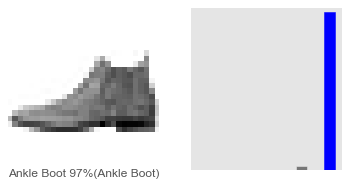

In [44]:
# NOTE
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인

in_data = 0
plt.figure(figsize = (6,3))
plt.subplot(1, 2, 1)
plot_img(in_data, pred, test_lab, test_img)
plt.subplot(1, 2, 2)
plot_value_arr(in_data, pred, test_lab)


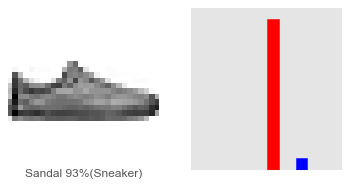

In [45]:
in_data = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_img(in_data, pred, test_lab, test_img)
plt.subplot(1, 2, 2)
plot_value_arr(in_data, pred, test_lab)

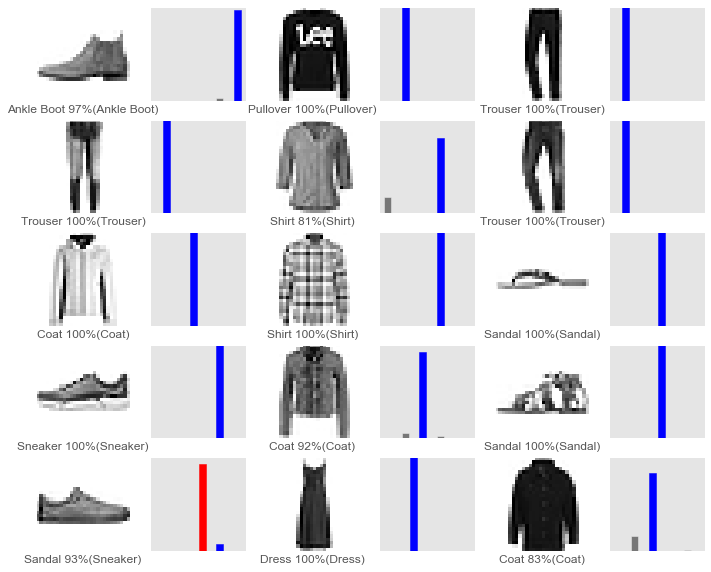

In [46]:
# NOTE
# 처음 x 개의 테스트 이미지와 예측 레이블, 진짜 레이블 출력
# 올바른 예측은 파랑색, 틀린 예측은 빨강색으로 표시

nrows = 5; ncols = 3
n_img = nrows * ncols
plt.figure(figsize = (2*2*ncols, 2*nrows))
for rep in range(n_img):
    plt.subplot(nrows, 2*ncols, 2*rep + 1)
    plot_img(rep, pred, test_lab, test_img)
    plt.subplot(nrows, 2*ncols, 2*rep + 2)
    plot_value_arr(rep, pred, test_lab)

In [ ]:
참고  
Tensorflow Keras 튜토리얼 (https://www.tensorflow.org/tutorials/keras/basic_classification)